In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from datetime import datetime, timedelta
import math

In [4]:
#time_entries1 = pd.read_excel(r'/Users/jessicyu/Time Entry Data_Sample 1.xls')
#time_entries1

In [5]:
# Insert a start date column

In [6]:
#time_entries1.insert(13, "WEEK_START_DATE", time_entries1["WEEK_END_DATE"] - pd.to_timedelta(7, unit = 'd'))

In [7]:
#time_entries = pd.read_excel(r'/Users/jessicyu/Time_Entry_Data_v2.xlsx')

In [8]:
time_entries = pd.read_csv("TIME_Entry_Data_v3.csv", low_memory = False)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,RES_PL_LEVEL_8,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,1985758,lhallada,High Touch Operations Manager,...,CX Amer.Proactive.USPS.Delivery,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaN
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,PS.APJ.SP INDIA,2018-10-13,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaN
2,901191,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2134905,doware,High Touch Operations Manager,...,CX Amer.Proactive.USPS.Delivery,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaN
3,909547,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,2518760,mtammana,Services Manager,...,CX Amer.Proactive.SP.Delivery,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaN
4,931291,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3720761,itebar,Security Consulting Engineer,...,CX EMEAR.South.Proactive.Architecture,2021-02-13,Design Review.1_1,NaN,NaN,NaN,1.0,202129,2020-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.Premier,2764788,patrbenn,Project Manager [C],...,AMER.ADN.ADC,2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,CX Amer.Proactive.TTG.COE,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,CX Amer.Proactive.TTG.COE,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,CX Amer.Proactive.TTG.COE,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [9]:
time_entries = time_entries.drop(columns = ["END_CUSTOMER_NAME", "ACCOUNT_NAME", "PID_PL_LEVEL_6", "PID_PL_LEVEL_7", "PID_PL_LEVEL_8", "RES_PL_LEVEL_6", "RES_PL_LEVEL_7", "RES_PL_LEVEL_8"])

In [10]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaN
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaN
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaN
3,909547,AS Transaction - USA,2518760,mtammana,Services Manager,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaN
4,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,NaN,NaN,NaN,1.0,202129,2020-04-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [11]:
time_entries["WEEK_END_DATE"] = pd.to_datetime(time_entries["WEEK_END_DATE"])

In [12]:
time_entries.insert(13, "WEEK_START_DATE", time_entries["WEEK_END_DATE"] - pd.to_timedelta(7, unit = 'd'))

In [13]:
time_entries["AS_TASK_ACTUAL_FINISH_DT"] = pd.to_datetime(time_entries["AS_TASK_ACTUAL_FINISH_DT"])

In [14]:
time_entries["AS_TASK_ACTUAL_START_DT"] = pd.to_datetime(time_entries["AS_TASK_ACTUAL_START_DT"])

In [15]:
true_deliverable_values = time_entries["DELIVERABLE"]

In [16]:
time_entries = time_entries[time_entries["NO_OF_HRS"] != 0]

In [17]:
time_entries["DELIVERABLE"].value_counts()

Project Management Support.1_1                                   10335
Ongoing Design Support.1_1                                        8242
Configuration and software change support.1_1                     6372
Project Managemt Analyze_1                                        3357
Data Low Analyze_1                                                3085
                                                                 ...  
Final Presentation_1                                                 1
Type 2 Software Management Process and Procedure Document.2_2        1
WL-Develop WIreless CCP-NCD_5                                        1
Type 1 Diagnostic Analysis.1_1                                       1
DL-Day 1 Support_2                                                   1
Name: DELIVERABLE, Length: 1954, dtype: int64

In [18]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,2018-12-15,NaT
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,2018-10-06,NaT
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,2019-07-27,NaT
4,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,NaN,NaN,NaN,1.0,202129,2020-04-01,2021-02-06,NaT
5,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,NaN,NaN,NaN,35.0,202130,2020-04-01,2021-02-13,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-01-04,2020-06-29
150356,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-08-15,2020-12-25
150357,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-08-15,2020-12-25
150358,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-08-15,2020-12-25


In [658]:
#grouped_table = time_entries.groupby(["PROJECT_ID", "DELIVERABLE", "EMAIL_ADDRESS"]).sum()
#grouped_table

In [659]:
# Questions: Are all the data in the deliverable column deliverables?
# Need clarification on deliverables and the time frame
# Maybe possibly have a start date information?

In [660]:
time_entries["DELIVERABLE"].unique()

array(['CNS Federal High Touch Ops Mgmt Case Management/Escalation Management.1_1',
       'Design Support', 'Exception Task', ...,
       'Operations Onsite Consulting.2_2', 'Design Change Support.9_9',
       'External Network Penetration Test_1'], dtype=object)

In [547]:
#time_entries1["DELIVERABLE"].unique()

In [548]:
#time_entries1 = time_entries1.replace(".\d+_\d+", "", regex = True)

In [549]:
#time_entries1["DELIVERABLE"].unique()

In [550]:
# STEP 1 --> Data Cleaning!

In [661]:
type(time_entries["DELIVERABLE"][0])

str

In [662]:
# We know the data type here is a string

In [19]:
time_entries = time_entries.replace(".\d+_\d+", "", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,2018-12-15,NaT
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,2018-10-06,NaT
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,2019-07-27,NaT
4,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,2021-02-06,NaT
5,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support,NaN,NaN,NaN,35.0,202130,2020-04-01,2021-02-13,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-01-04,2020-06-29
150356,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-08-15,2020-12-25
150357,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-08-15,2020-12-25
150358,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-08-15,2020-12-25


In [20]:
time_entries.insert(6, "TRUE_DELIVERABLE", true_deliverable_values)

In [21]:
time_entries["DELIVERABLE"].value_counts()

Project Management Support                       10694
Ongoing Design Support                            9214
Configuration and software change support         7347
Project Managemt Analyze_1                        3357
Data Low Analyze_1                                3085
                                                 ...  
Predictive WLAN RF_2                                 1
DL-IL-Develop CCP NCD_5                              1
HLD                                                  1
WM-IL-Wireless Project Engineering Control_13        1
ACI Detailed Design Workshop_2                       1
Name: DELIVERABLE, Length: 1712, dtype: int64

In [555]:
time_entries = time_entries.replace(".*[a-zA-Z]onfiguration and [a-zA-Z]oftware [a-zA-Z]hange [a-zA-Z]upport.*", "Configuration and software change support", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,1985758,lhallada,High Touch Operations Manager,...,2018-12-15,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
2,901191,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2134905,doware,High Touch Operations Manager,...,2019-07-27,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaT
3,909547,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,2518760,mtammana,Services Manager,...,2021-01-16,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaT
4,931291,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3720761,itebar,Security Consulting Engineer,...,2021-02-06,2021-02-13,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.Premier,2764788,patrbenn,Project Manager [C],...,2020-01-04,2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [556]:
time_entries = time_entries.replace(".*[a-zA-Z]esign .*[a-zA-Z]upport.*", "Ongoing Design Support", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,1985758,lhallada,High Touch Operations Manager,...,2018-12-15,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
2,901191,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2134905,doware,High Touch Operations Manager,...,2019-07-27,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaT
3,909547,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,2518760,mtammana,Services Manager,...,2021-01-16,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaT
4,931291,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3720761,itebar,Security Consulting Engineer,...,2021-02-06,2021-02-13,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.Premier,2764788,patrbenn,Project Manager [C],...,2020-01-04,2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [557]:
time_entries = time_entries.replace(".*[a-zA-Z]roactive .*[a-zA-Z]oftware .*[a-zA-Z]ecommendation .*[a-zA-Z]eport.*", "Proactive Software Recommendation Report", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,1985758,lhallada,High Touch Operations Manager,...,2018-12-15,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
2,901191,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2134905,doware,High Touch Operations Manager,...,2019-07-27,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaT
3,909547,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,2518760,mtammana,Services Manager,...,2021-01-16,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaT
4,931291,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3720761,itebar,Security Consulting Engineer,...,2021-02-06,2021-02-13,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.Premier,2764788,patrbenn,Project Manager [C],...,2020-01-04,2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [558]:
time_entries = time_entries.replace(".*[a-zA-Z]scalation .*[a-zA-Z]ngineering .*[a-zA-Z]upport.*", "Ongoing Escalation Engineering Support", regex = True)
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
0,897139,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,1985758,lhallada,High Touch Operations Manager,...,2018-12-15,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,NaT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
2,901191,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2134905,doware,High Touch Operations Manager,...,2019-07-27,2019-08-03,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,NaT
3,909547,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.SP,CX Amer.Proactive.SP.Delivery,2518760,mtammana,Services Manager,...,2021-01-16,2021-01-23,Lab services_1,NaN,SP MOBILITY,Mobility Policy and Access,0.0,202126,2019-05-18,NaT
4,931291,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3720761,itebar,Security Consulting Engineer,...,2021-02-06,2021-02-13,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150355,917688,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.Premier,2764788,patrbenn,Project Manager [C],...,2020-01-04,2020-01-11,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-06-29
150356,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-12-25
150357,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-12-25
150358,926163,AS Transaction - USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.East,3522749,mwhitele,Customer Delivery Architect,...,2020-08-15,2020-08-22,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-12-25


In [499]:
time_entries["DELIVERABLE"].value_counts()

Ongoing Design Support                               12921
Project Management Support                           11414
Configuration and software change support             7562
Project Managemt Analyze_1                            3511
Data Low Analyze_1                                    3187
                                                     ...  
compute_6                                                1
Project Managment                                        1
Migrate Groom 10G Client Express Fibers 3 sites_1        1
DM-Whitelisting_7                                        1
VL-SL-Change Implementation and Verification_2           1
Name: DELIVERABLE, Length: 1714, dtype: int64

In [500]:
# Questions
    #Are Design Support and Design Change Support the same?
    #Are Design Support and Ongoing Design Support the same?

In [501]:
design_support_entries = time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"][["NO_OF_HRS"]]
design_support_entries

,NO_OF_HRS
1,20.0
16,12.0
17,12.0
18,12.0
19,10.0
...,...
150321,1.0
150322,24.0
150323,16.0
150351,3.0


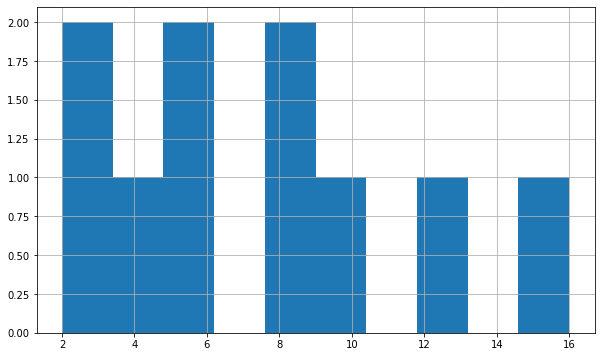

In [118]:
RM_SL_Meetings_Communation_entries.hist(figsize = [10, 6]);

In [35]:
#time_entries[(time_entries["WEEK_START_DATE"] >= "2021-02-06") & (time_entries["WEEK_END_DATE"] <= "2021-02-20")]

In [36]:
time_entries["DELIVERABLE"].value_counts()

Ongoing Design Support                               12921
Project Management Support                           11414
Configuration and software change support             7562
Project Managemt Analyze_1                            3511
Data Low Analyze_1                                    3187
                                                     ...  
compute_6                                                1
Project Managment                                        1
Migrate Groom 10G Client Express Fibers 3 sites_1        1
DM-Whitelisting_7                                        1
VL-SL-Change Implementation and Verification_2           1
Name: DELIVERABLE, Length: 1714, dtype: int64

In [37]:
# --------------------------------------------- ANALYSES BEGINS! ---------------------------------------------------

In [142]:
hi = time_entries[(time_entries["DELIVERABLE"] == "Enterprise Security Advisor") & (time_entries["EMAIL_ADDRESS"] == "joschuma")]
hi

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
53671,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-23,2019-03-02,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,32.0,201931,2019-02-01,NaN
117385,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-03-09,2019-03-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,3.0,201933,2019-02-01,NaN
128452,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-09,2019-02-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.0,201929,2019-02-01,NaN
131790,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-02,2019-02-09,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.5,201928,2019-02-01,NaN
137320,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-16,2019-02-23,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,23.0,201930,2019-02-01,NaN


In [145]:
uh = hi.copy()
uh_end_date = min(uh["WEEK_END_DATE"])
uh["Week Number"] = (uh['WEEK_END_DATE'] - pd.Timestamp(uh_end_date)).dt.days // 7 + 1
uh

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,Week Number
53671,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-03-02,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,32.0,201931,2019-02-01,NaN,4
117385,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-03-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,3.0,201933,2019-02-01,NaN,6
128452,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.0,201929,2019-02-01,NaN,2
131790,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-09,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.5,201928,2019-02-01,NaN,1
137320,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-23,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,23.0,201930,2019-02-01,NaN,3


In [142]:
def deliverable_distribution(deliverable, start_date, end_date):
    entries_table = time_entries[(time_entries["DELIVERABLE"] == deliverable) & 
                                 (time_entries["WEEK_START_DATE"] >= start_date) & 
                                 (time_entries["WEEK_END_DATE"] <= end_date)]["NO_OF_HRS"]
    print("Minimum:", min(entries_table))
    print("Maximimum:", max(entries_table))
    print("Mean:", np.mean(entries_table))
    print("Median:", np.median(entries_table))
    print("Standard Deviation:", np.std(entries_table))
    return entries_table.hist(bins = range(0, int(max(entries_table)) + 10, 5), figsize = [10, 6])

In [581]:
#def week_number_employee(deliverable, employee_name):
#    table = time_entries[(time_entries["DELIVERABLE"] == deliverable) & (time_entries["EMAIL_ADDRESS"] == employee_name)]
#    earliest_end_date = min(table["WEEK_END_DATE"])
#    employee_table = table.copy()
#    employee_table["WEEK_NUMBER"] = (employee_table['WEEK_END_DATE'] - pd.Timestamp(earliest_end_date)).dt.days // 7 + 1
#    return employee_table

In [582]:
#def week_number(deliverable):
#    for employee in unique_employees:
#        employee_table = table[table["EMAIL_ADDRESS"] == employee]
#        earliest_end_date = min(employee_table["WEEK_END_DATE"])
#        final_table = employee_table.copy()
#        final_table["WEEK_NUMBER"] = (final_table['WEEK_END_DATE'] - pd.Timestamp(earliest_end_date)).dt.days // 7 + 1
#    return final_table

In [583]:
def deliverable_week(deliverable):
    deliverable_table = time_entries.copy()
    deliverable_table = deliverable_table[deliverable_table["DELIVERABLE"] == deliverable]
    deliverable_table["WEEK_NUMBER"] = (deliverable_table['WEEK_START_DATE'] - deliverable_table["AS_TASK_ACTUAL_START_DT"]).dt.days // 7 + 1
    return deliverable_table

In [584]:
#def week_number(deliverable):
#    df_list = []
#    unique_employees = time_entries[time_entries["DELIVERABLE"] == deliverable]["EMAIL_ADDRESS"].unique()
#    for employee in unique_employees:
#        table = time_entries[time_entries["EMAIL_ADDRESS"] == employee]
#        earliest_end_date = min(table["WEEK_END_DATE"])
#        employee_table = table.copy()
#        employee_table["WEEK_NUMBER"] = (employee_table['WEEK_END_DATE'] - pd.Timestamp(earliest_end_date)).dt.days // 7 + 1
#        df_list.append(employee_table)
#    df_list = pd.concat(df_list)
#    return df_list

In [665]:
time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT
16,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201952,2018-08-06,2019-07-20,NaT
17,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201935,2018-08-06,2019-03-23,NaT
18,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201936,2018-08-06,2019-03-30,NaT
19,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-02-29,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,10.0,202031,2019-09-02,2020-02-22,NaT
20,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-06-06,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,8.0,202045,2019-09-02,2020-05-30,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150321,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-30,Ongoing Design Support,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,1.0,201935,2018-07-20,2019-03-23,NaT
150322,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-01-25,Ongoing Design Support,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,24.0,202026,2019-12-02,2020-01-18,NaT
150323,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-04-18,Ongoing Design Support,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,16.0,202038,2019-12-02,2020-04-11,NaT
150351,898718,AS Subscription-USA,2038772,odmolina,Security Consulting Engineer,2019-09-07,Ongoing Design Support,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,3.0,202006,2018-07-20,2019-08-31,NaT


In [701]:
def week_number(deliverable):
    unique_employees = time_entries[time_entries["DELIVERABLE"] == deliverable]["EMAIL_ADDRESS"].unique()
    df_list = pd.concat([employee_table_generator(deliverable, employee) for employee in unique_employees])
    return df_list

In [707]:
def employee_week_number(deliverable, employee):
    table = time_entries[(time_entries["DELIVERABLE"] == deliverable) & (time_entries["EMAIL_ADDRESS"] == employee)]
    earliest_end_date = min(table["WEEK_END_DATE"])
    employee_table = table.copy()
    employee_table["WEEK_NUMBER"] = (employee_table['WEEK_END_DATE'] - pd.Timestamp(earliest_end_date)).dt.days // 7 + 1
    return employee_table

In [716]:
def deliverable_calculations(deliverable):
    unique_employees = time_entries[time_entries["DELIVERABLE"] == deliverable]["EMAIL_ADDRESS"].unique()
    unique_project_ids = time_entries[time_entries["DELIVERABLE"] == deliverable]["SEGMENT1"].unique()
    employee_df = pd.concat([employee_week_number(deliverable, employee) for employee in unique_employees])
    project_df = pd.concat([project_hours(employee_df, project_id) for project_id in unique_project_ids])
    project_df["PROPORTION_PROJECT_HRS"] = project_df["PROPORTION_PROJECT_HRS"].fillna(0)
    return project_df

In [796]:
def project_hours(df, project_id):
    deliv_table = df[df["SEGMENT1"] == project_id]
    project_table = deliv_table.copy()
    total_hours = sum(project_table["NO_OF_HRS"])
    project_table["PROPORTION_PROJECT_HRS"] = project_table["NO_OF_HRS"] / total_hours
    project_table["DELIVERABLE_LENGTH"] = max(project_table["WEEK_NUMBER"]) - min(project_table["WEEK_NUMBER"])
    return project_table

In [828]:
# ---------------------------------- REVISED ANALYSIS BEGINS ------------------------------------------

In [22]:
time_table = time_entries.groupby(["SEGMENT1", "DELIVERABLE"]).agg({"NO_OF_HRS": "sum"}).reset_index().rename(columns = {"NO_OF_HRS": "TOTAL_HOURS"})
time_table


,SEGMENT1,DELIVERABLE,TOTAL_HOURS
0,852893,AWA Delivery Subtask,17.00
1,852893,DO NOT USE,62.00
2,852893,Design Workshop,8.00
3,852893,Low Level Design,32.00
4,852893,Network Ready For Use Tests Execution,55.25
...,...,...,...
6628,949864,Project Management Support,26.00
6629,950570,Engineering Onsite Consulting,58.00
6630,950852,Onboarding/Non Productive,31.00
6631,A01777,Onboarding/Non Productive,22.00


In [23]:
time_entries = time_entries.merge(time_table, on = ["SEGMENT1", "DELIVERABLE"], how = "left")
time_entries["PERCENT_PROJECT_HRS"] = time_entries["NO_OF_HRS"] / time_entries["TOTAL_HOURS"]

In [24]:
time_entries.groupby("EMAIL_ADDRESS").agg(list).reset_index()
#Here, create a function that iterates through each deliverable group and concats a table that finds the week number
#for that specific employee on that specific deliverable

,EMAIL_ADDRESS,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS
0,aaashish,[882879],[AS Subscription-USA],[1860772],[Consulting Engineer],[2020-04-04 00:00:00],[Type 2 Software Analysis & Release Standards ...,[Type 2 Software Analysis & Release Standards ...,[nan],[nan],[nan],[28.0],[202036],[2017-11-14 00:00:00],[2020-03-28 00:00:00],[NaT],[585.0],[0.04786324786324787]
1,aabundis,"[890856, 890856, 890856, 890856, 890856, 89085...","[AS Transaction - USA, AS Transaction - USA, A...","[1957953, 1957953, 1957953, 1957953, 1957953, ...","[Consulting Engineer, Consulting Engineer, Con...","[2018-10-06 00:00:00, 2018-07-21 00:00:00, 201...","[DM-Eng Package & Updates_6, DM-Develop CCP-NC...","[DM-Eng Package & Updates_6, DM-Develop CCP-NC...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Networking, Networking, Networking, Networkin...","[Routing and Switching, Routing and Switching,...","[1.0, 2.0, 3.0, 1.0, 3.0, 4.0, 3.0, 1.0, 3.0, ...","[201910, 201851, 201929, 201911, 201901, 20191...","[2018-07-03 00:00:00, 2018-07-03 00:00:00, 201...","[2018-09-29 00:00:00, 2018-07-14 00:00:00, 201...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[902.0, 784.0, 277.5, 902.0, 784.0, 902.0, 902...","[0.0011086474501108647, 0.002551020408163265, ..."
2,aadeodha,"[865198, 865198, 865198, 865198, 865198, 86519...","[AS Subscription-USA, AS Subscription-USA, AS ...","[1632834, 1632834, 1632834, 1632834, 1632834, ...","[Consulting Engineer, Consulting Engineer, Con...","[2018-08-11 00:00:00, 2018-07-14 00:00:00, 201...","[Ongoing Design Support.7_7, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[16.0, 20.0, 32.0, 32.0, 18.0, 20.0, 20.0]","[201902, 201850, 201921, 201920, 201852, 20185...","[2018-01-26 00:00:00, 2018-01-26 00:00:00, 201...","[2018-08-04 00:00:00, 2018-07-07 00:00:00, 201...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT]","[3610.5, 3610.5, 3610.5, 3610.5, 3610.5, 3610....","[0.004431519180168952, 0.00553939897521119, 0...."
3,aafrose,"[891047, 891047, 891047, 891047, 891047, 89104...","[AS Transaction - UKH, AS Transaction - UKH, A...","[1955173, 1955173, 1955173, 1955173, 1955173, ...","[Customer Delivery Advisor, Customer Delivery ...","[2018-09-29 00:00:00, 2018-09-29 00:00:00, 201...","[DNA Advisory_1, DNA Advisory_1, DNA Advisory_...","[DNA Advisory_1, DNA Advisory_1, DNA Advisory_...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[SECURITY, Networking, Networking, Networking,...","[NETWORK SECURITY, Routing and Switching, Wire...","[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 16.0, 16.0, 16....","[201909, 201909, 201909, 201909, 201909, 20190...","[2018-04-16 00:00:00, 2018-04-16 00:00:00, 201...","[2018-09-22 00:00:00, 2018-09-22 00:00:00, 201...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, ...","[744.0, 744.0, 744.0, 744.0, 744.0, 744.0, 744...","[0.005376344086021506, 0.005376344086021506, 0..."
4,aagosto,[924454],[AS Subscription-USA],[3409753],[Engineer - Operations [C]],[2020-02-08 00:00:00],[Continuous Test Cycle Integration Validation....,[Continuous Test Cycle Integration Validation],[nan],[nan],[nan],[40.0],[202028],[2019-10-22 00:00:00],[2020-02-01 00:00:00],[NaT],[1428.0],[0.028011204481792718]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,zshahid,"[918239, 916063, 916063, 918239, 918239, 91823...","[AS Subscription-USA, AS Subscription-USA, AS ...","[2772779, 2745809, 2745809, 2772779, 2772779, ...","[Engineer - Network [C], Engineer - Network [C...","[2019-12-14 00:00:00, 2020-01-11 00:00:00, 201...","[Requests, Cisco Services hosted analytics and...","[Requests, Cisco Services hosted analytics and...","[nan, nan, nan, nan, nan, nan,

In [25]:
time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]["AS_PROJECT_TYPE_CD"].value_counts()

AS Subscription-USA     6398
AS Subscription-UKH     1664
AS Subscription-CAN      468
AS Subscription-ZAF      231
AS Subscription -RUS     136
AS Subscription - BV     119
AS Subscription-CNGZ      60
AS Subscription - CN      46
AS Subscription-JPN       42
AS Subscription-ITL       28
AS Subscription-IND       22
Name: AS_PROJECT_TYPE_CD, dtype: int64

In [ ]:
# All of the Ongoing Design Supports are subscription type projects

In [909]:
time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]["TRUE_DELIVERABLE"].value_counts()

Ongoing Design Support.1_1      8242
Ongoing Design Support.2_2       421
Ongoing Design Support.7_7       125
Ongoing Design Support.10_10     115
Ongoing Design Support.9_9        69
Ongoing Design Support.8_8        62
Ongoing Design Support.3_3        55
Ongoing Design Support.1_2        55
Ongoing Design Support.12_12      25
Ongoing Design Support.4_4        21
Ongoing Design Support.1_4         7
Ongoing Design Support.11_11       7
Ongoing Design Support.5_5         6
Ongoing Design Support.6_6         3
Ongoing Design Support.13_13       1
Name: TRUE_DELIVERABLE, dtype: int64

In [1008]:
#Here, we can see that multiple Ongoing Design Support deliverables are all grouped together under Ongoing Design Support

In [26]:
design_support_entries = time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]

In [27]:
design_support_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS
15,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201952,2018-08-06,2019-07-20,NaT,1517.00,0.007910
16,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201935,2018-08-06,2019-03-23,NaT,1517.00,0.007910
17,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201936,2018-08-06,2019-03-30,NaT,1517.00,0.007910
18,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-02-29,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,10.0,202031,2019-09-02,2020-02-22,NaT,800.00,0.012500
19,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-06-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,8.0,202045,2019-09-02,2020-05-30,NaT,800.00,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141296,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,1.0,201935,2018-07-20,2019-03-23,NaT,1842.00,0.000543
141297,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-01-25,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,24.0,202026,2019-12-02,2020-01-18,NaT,2058.50,0.011659
141298,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-04-18,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,16.0,202038,2019-12-02,2020-04-11,NaT,2058.50,0.007773
141326,898718,AS Subscription-USA,2038772,odmolina,Security Consulting Engineer,2019-09-07,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,3.0,202006,2018-07-20,2019-08-31,NaT,1842.00,0.001629


In [28]:
design_support_entries["WEEK_NUMBER"] = (design_support_entries['WEEK_END_DATE'] - 
                                         design_support_entries["AS_TASK_ACTUAL_START_DT"]).dt.days // 7 + 1

<ipython-input-28-08f11559b54b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_support_entries["WEEK_NUMBER"] = (design_support_entries['WEEK_END_DATE'] - design_support_entries["AS_TASK_ACTUAL_START_DT"]).dt.days // 7 + 1


In [29]:
design_support_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,WEEK_NUMBER
15,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201952,2018-08-06,2019-07-20,NaT,1517.00,0.007910,51.0
16,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201935,2018-08-06,2019-03-23,NaT,1517.00,0.007910,34.0
17,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201936,2018-08-06,2019-03-30,NaT,1517.00,0.007910,35.0
18,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-02-29,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,10.0,202031,2019-09-02,2020-02-22,NaT,800.00,0.012500,26.0
19,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-06-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,8.0,202045,2019-09-02,2020-05-30,NaT,800.00,0.010000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141296,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,1.0,201935,2018-07-20,2019-03-23,NaT,1842.00,0.000543,37.0
141297,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-01-25,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,24.0,202026,2019-12-02,2020-01-18,NaT,2058.50,0.011659,8.0
141298,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-04-18,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,16.0,202038,2019-12-02,2020-04-11,NaT,2058.50,0.007773,20.0
141326,898718,AS Subscription-USA,2038772,odmolina,Security Consulting Engineer,2019-09-07,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,3.0,202006,2018-07-20,2019-08-31,NaT,1842.00,0.001629,60.0


In [30]:
#Create an earliest timecard submission for each project

In [31]:
design_support_start_dates = design_support_entries.groupby("SEGMENT1").agg({"WEEK_END_DATE": "min"})
design_support_start_dates = design_support_start_dates.rename(columns = {"WEEK_END_DATE": "EARLIEST_START_DATE"})
design_support_start_dates

,EARLIEST_START_DATE
SEGMENT1,
865198,2018-05-05
869844,2018-05-05
879094,2019-03-09
881109,2018-04-07
881494,2018-02-24
...,...
935617,2020-05-30
941289,2020-08-08
941361,2020-10-24


In [32]:
design_support_entries = design_support_entries.merge(design_support_start_dates, on = "SEGMENT1", how = "left")

In [33]:
design_support_entries[design_support_entries["SEGMENT1"] == "865198"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,WEEK_NUMBER,EARLIEST_START_DATE
133,865198,AS Subscription-USA,1632834,pgjergja,Engineer - Consultant [C],2018-09-22,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,40.0,201908,2018-01-26,2018-09-15,NaT,3610.5,0.011079,35.0,2018-05-05
174,865198,AS Subscription-USA,1632834,bedelson,Engineer - Network [C],2018-11-17,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,40.0,201916,2018-01-26,2018-11-10,NaT,3610.5,0.011079,43.0,2018-05-05
228,865198,AS Subscription-USA,1632834,ukastrat,Engineer - Network [C],2018-09-01,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,48.0,201905,2018-01-26,2018-08-25,NaT,3610.5,0.013295,32.0,2018-05-05
292,865198,AS Subscription-USA,1632834,bhemani,Software Engineer,2018-07-21,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,40.0,201851,2018-01-26,2018-07-14,NaT,3610.5,0.011079,26.0,2018-05-05
293,865198,AS Subscription-USA,1632834,katturne,Customer Delivery Engineering Technical Leader,2018-06-30,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,1.0,201848,2018-01-26,2018-06-23,NaT,3610.5,0.000277,23.0,2018-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,865198,AS Subscription-USA,1632834,bedelson,Engineer - Network [C],2019-01-19,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,40.0,201925,2018-01-26,2019-01-12,NaT,3610.5,0.011079,52.0,2018-05-05
8808,865198,AS Subscription-USA,1632834,pgjergja,Engineer - Consultant [C],2018-09-15,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,36.0,201907,2018-01-26,2018-09-08,NaT,3610.5,0.009971,34.0,2018-05-05
9132,865198,AS Subscription-USA,1632834,yfloresp,Consulting Engineer,2018-10-13,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-01-26,2018-10-06,NaT,3610.5,0.005539,38.0,2018-05-05
9134,865198,AS Subscription-USA,1632834,bedelson,Engineer - Network [C],2018-12-22,Ongoing Design Support.7_7,Ongoing Design Support,NaN,NaN,NaN,40.0,201921,2018-01-26,2018-12-15,NaT,3610.5,0.011079,48.0,2018-05-05


In [34]:
(design_support_entries["AS_TASK_ACTUAL_FINISH_DT"] == np.nan).value_counts()

False    9214
Name: AS_TASK_ACTUAL_FINISH_DT, dtype: int64

In [35]:
design_support_entries["EARLIEST_START_DATE"] = design_support_entries["EARLIEST_START_DATE"].replace({np.nan: 0})

In [36]:
design_support_entries["AS_TASK_ACTUAL_FINISH_DT"] = design_support_entries["AS_TASK_ACTUAL_FINISH_DT"].replace({np.nan: 0})

In [37]:
design_support_entries["START_TIME_GAP"] = (design_support_entries["EARLIEST_START_DATE"] - 
                                            design_support_entries["AS_TASK_ACTUAL_START_DT"]).dt.days

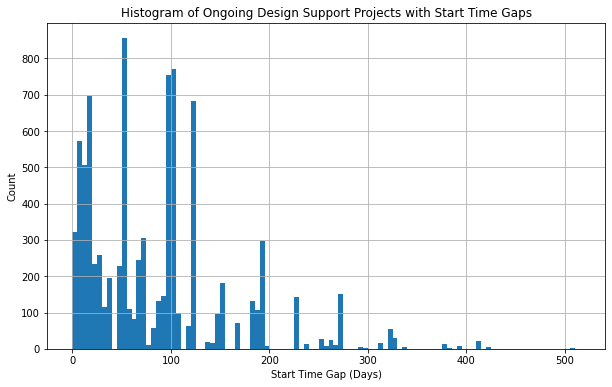

In [38]:
design_support_gaps = design_support_entries["START_TIME_GAP"]
design_support_gaps.hist(bins = range(0, int(max(design_support_entries["START_TIME_GAP"])) + 10, 5), figsize = [10, 6])
plt.title("Histogram of Ongoing Design Support Projects with Start Time Gaps")
plt.xlabel("Start Time Gap (Days)")
plt.ylabel("Count");

In [39]:
design_support_entries["MEANING"].unique()

array(['Consulting Engineer', 'Security Consulting Engineer',
       'Customer Delivery Engineering Technical Leader',
       'Customer Delivery Architect', 'Engineer - Network -Architecture',
       'Security - Engineer [C]', 'Services Manager',
       'Leader, Customer Delivery', 'Engineer - Network [C]',
       'Customer Experience Customer Success Specialist',
       'Consulting Engineer [C]', 'Customer Project Manager',
       'Software Consulting Engineer', 'Technical Consulting Engineer',
       'Engineer - IT [C]',
       'Security Consulting Engineering Technical Leader',
       'Engineer - Consultant [C]', 'Systems Architect',
       'Project Manager [C]', 'Technical Solutions Architect',
       'Software Consulting Engineering Technical Leader',
       'Business Development Manager', 'Engineer - Network',
       'Technical Marketing Engineering Technical Leader',
       'Project Coordinator [C]', 'Software Engineer',
       'Customer Experience Product Manager', 'Engineer - 

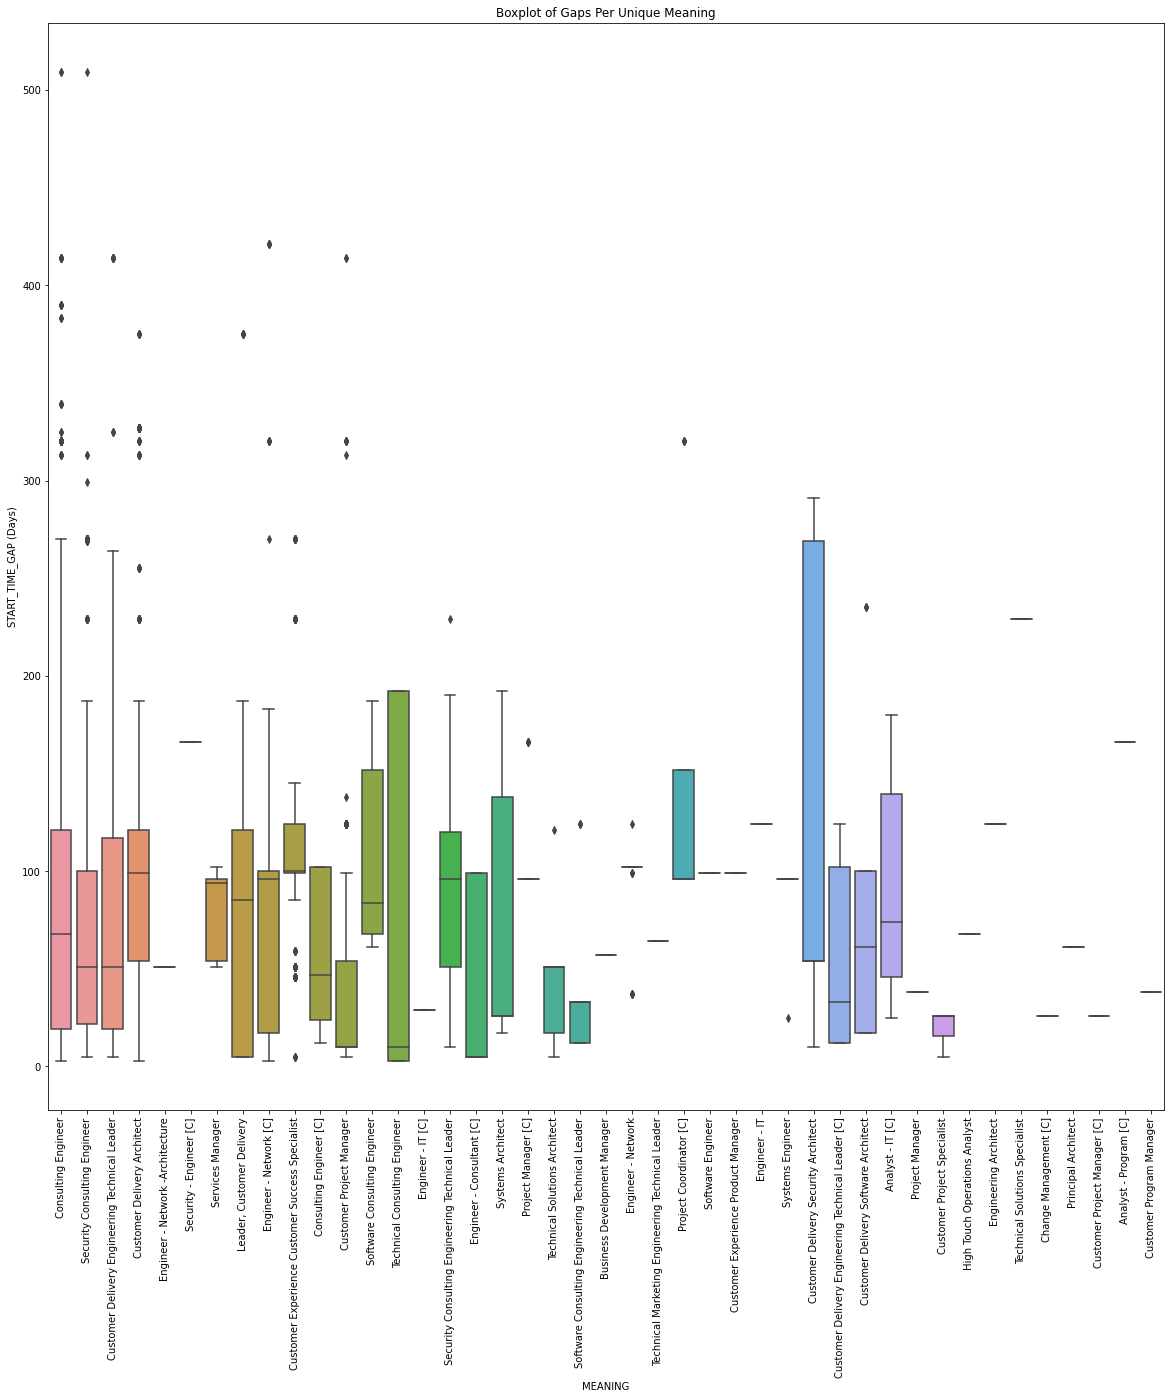

In [145]:
boxplot = sns.boxplot(x = "MEANING", y = "START_TIME_GAP", data = design_support_entries)
plt.rcParams['figure.figsize'] = (20, 20)
plt.title("Boxplot of Gaps Per Unique Meaning")
plt.ylabel("START_TIME_GAP (Days)")
plt.xticks(rotation = 90);

In [1079]:
design_support_entries["ARCHITECTURE"].value_counts()

SECURITY         1293
Networking        824
COLLABORATION     577
Name: ARCHITECTURE, dtype: int64

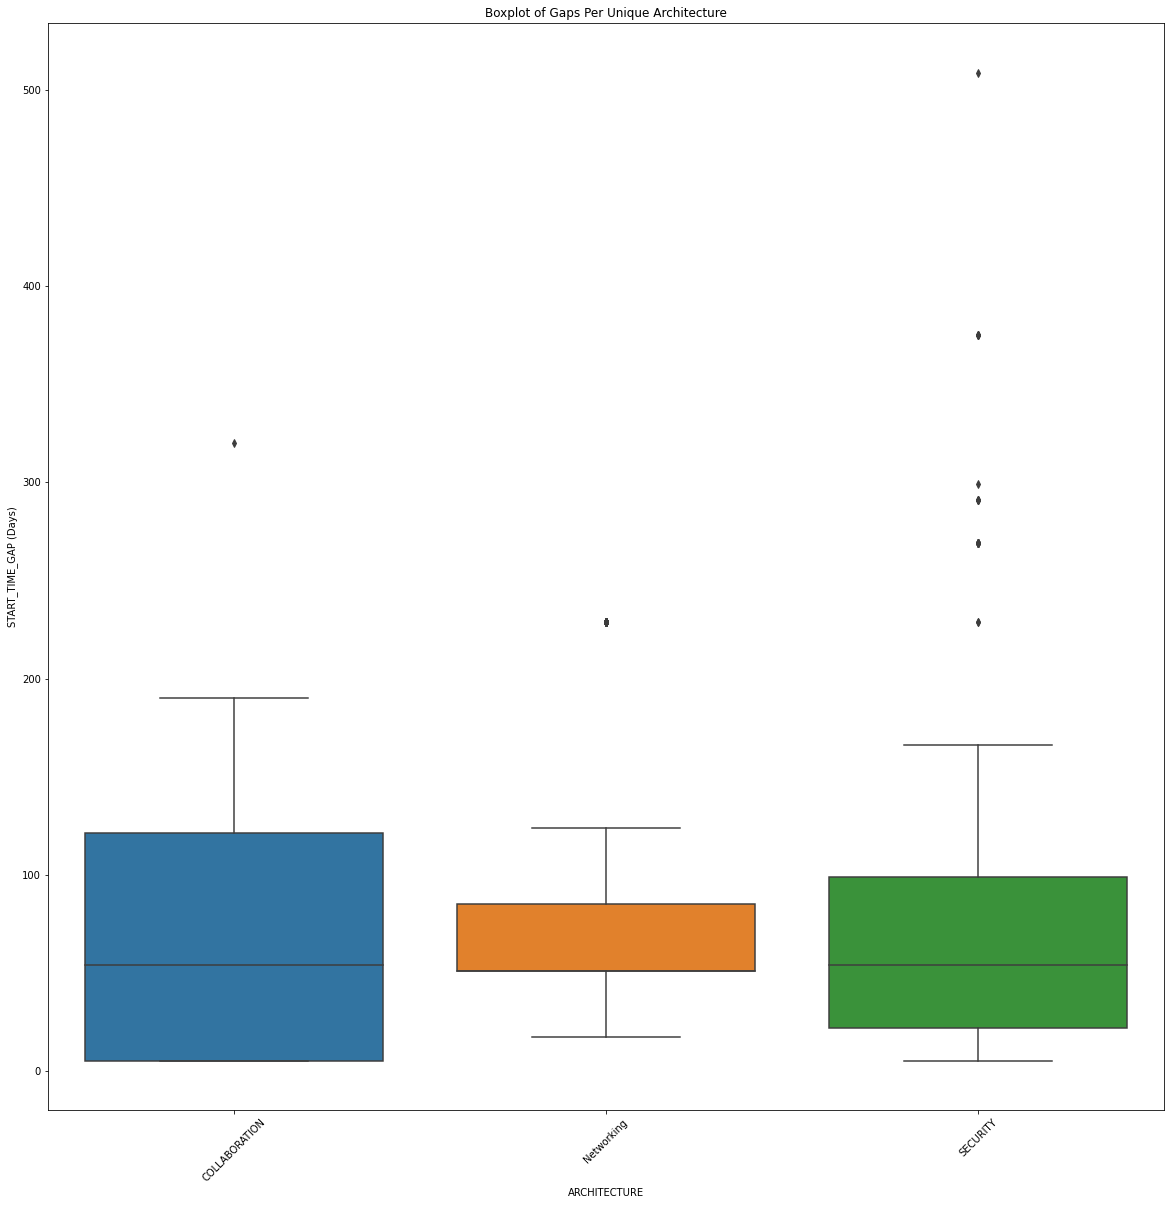

In [146]:
sns.boxplot(x = "ARCHITECTURE", y = "START_TIME_GAP", data = design_support_entries)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title("Boxplot of Gaps Per Unique Architecture")
plt.ylabel("START_TIME_GAP (Days)")
plt.xticks(rotation = 45);

In [ ]:
# Need to keep in mind that there are a lot of projects with "Architecture" as NaN values

In [1080]:
design_support_entries["TECHNOLOGY"].value_counts()

NETWORK SECURITY                1273
Routing and Switching            824
UNIFIED COMMUNICATIONS           511
VIDEO COLLABORATION               36
Cloud Meetings and Messaging      25
Security Policy and Access        13
Advanced Threat                    7
Customer Care                      5
Name: TECHNOLOGY, dtype: int64

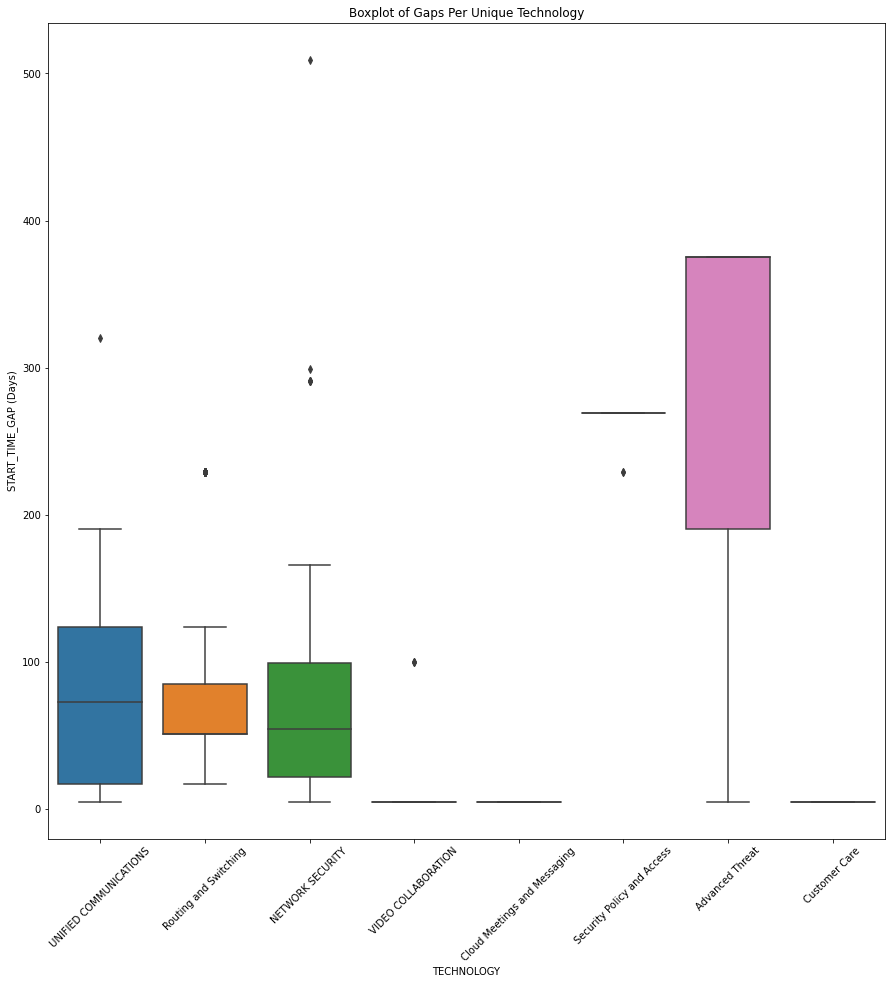

In [1097]:
sns.boxplot(x = "TECHNOLOGY", y = "START_TIME_GAP", data = design_support_entries)
plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Boxplot of Gaps Per Unique Technology")
plt.ylabel("START_TIME_GAP (Days)")
plt.xticks(rotation = 45);

In [ ]:
# Need to keep in mind that there are a lot of projects with "Architecture" as NaN values

In [41]:
design_support_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,WEEK_NUMBER,EARLIEST_START_DATE,START_TIME_GAP
0,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201952,2018-08-06,2019-07-20,0,1517.00,0.007910,51.0,2018-12-08,124.0
1,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201935,2018-08-06,2019-03-23,0,1517.00,0.007910,34.0,2018-12-08,124.0
2,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201936,2018-08-06,2019-03-30,0,1517.00,0.007910,35.0,2018-12-08,124.0
3,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-02-29,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,...,10.0,202031,2019-09-02,2020-02-22,0,800.00,0.012500,26.0,2019-11-23,82.0
4,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-06-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,...,8.0,202045,2019-09-02,2020-05-30,0,800.00,0.010000,40.0,2019-11-23,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9209,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,1.0,201935,2018-07-20,2019-03-23,0,1842.00,0.000543,37.0,2018-10-27,99.0
9210,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-01-25,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,24.0,202026,2019-12-02,2020-01-18,0,2058.50,0.011659,8.0,2019-12-07,5.0
9211,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-04-18,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,16.0,202038,2019-12-02,2020-04-11,0,2058.50,0.007773,20.0,2019-12-07,5.0
9212,898718,AS Subscription-USA,2038772,odmolina,Security Consulting Engineer,2019-09-07,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,3.0,202006,2018-07-20,2019-08-31,0,1842.00,0.001629,60.0,2018-10-27,99.0


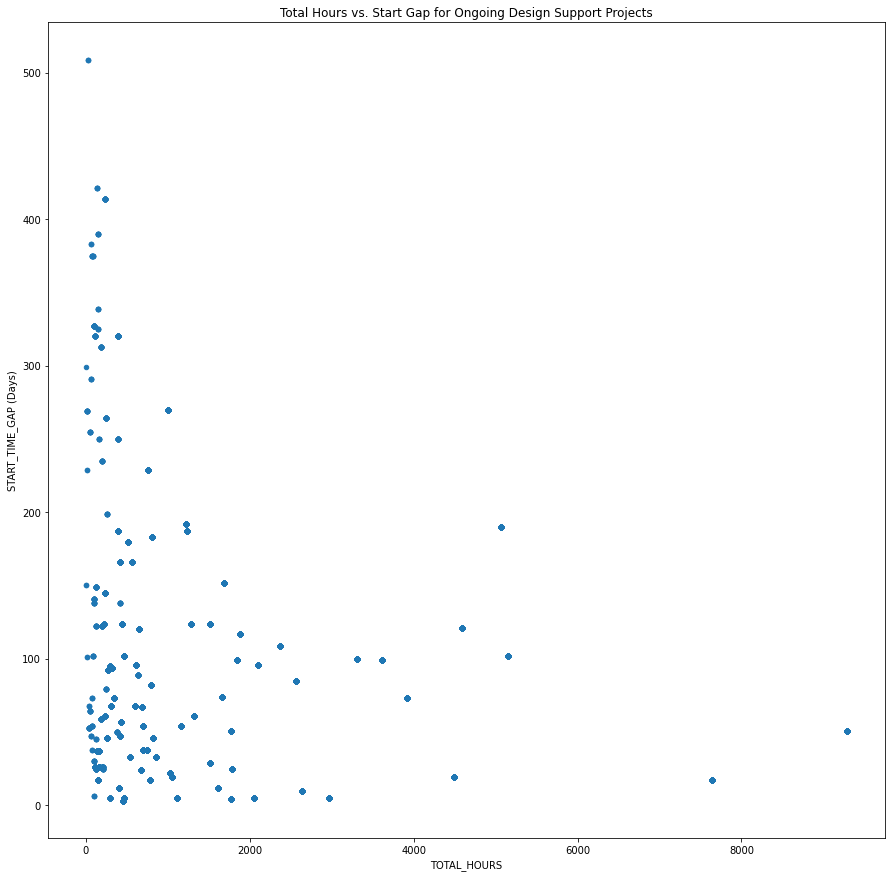

In [1094]:
design_support_entries.plot.scatter(x = "TOTAL_HOURS", y = "START_TIME_GAP")
plt.title("Total Hours vs. Start Gap for Ongoing Design Support Projects")
plt.ylabel("START_TIME_GAP (Days)");

In [42]:
correlation = design_support_entries["TOTAL_HOURS"].corr(design_support_entries["START_TIME_GAP"])
correlation

-0.16772734987896437

In [43]:
# Potential correlation factors: Meaning, Architecture, Total hours, 

In [44]:
# ----------------------------------- REGRESSION ANALYSIS -----------------------------------------------

In [45]:
# Deliverables as the columns of 1's and 0's (individual features) and have the projects become their own record

In [46]:
len(time_entries["DELIVERABLE"].unique())

1712

In [47]:
len(time_entries["TRUE_DELIVERABLE"].unique())

1954

In [48]:
len(time_entries["SEGMENT1"].unique())

1143

In [49]:
time_entries.set_index("SEGMENT1")["DELIVERABLE"].str.get_dummies().add_prefix("DLV_").max(level = 0)

,DLV_ ACI Adoption Assessment and Strategy _1,DLV_ Adoption Marketing and Communications,DLV_ BCS IPLS Service,DLV_ Circuit emulation _1,DLV_ Discovery Workshop _1,DLV_ Initial Ledger,DLV_ Layer 4-7 Integration_1,DLV_ Planning and Design_1,DLV_ Preparation of project documentation Risk Analysis UCS_1,DLV_ SAP HANA HA with Linux Clustering _1,...,DLV_iWAN Post-Implementation Support & LiveAction Deployment_1,DLV_iWAN SDD_1,DLV_iWAN SRD_1,DLV_iWAN Testing_1,DLV_pre-iCAST assessment report_1,DLV_project related document_1,DLV_threat intelligence report_1,DLV_vEdge Deployment - Qty.,DLV_vEdge deployment_4,DLV_vManage Deployment - Qty.
SEGMENT1,,,,,,,,,,,,,,,,,,,,,
897139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
891689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1119]:
dlv_features = time_entries.set_index("SEGMENT1")["DELIVERABLE"].str.get_dummies().add_prefix("DLV_").max(level = 0)

In [1120]:
dlv_features

,DLV_ ACI Adoption Assessment and Strategy _1,DLV_ Adoption Marketing and Communications,DLV_ BCS IPLS Service,DLV_ Circuit emulation _1,DLV_ Discovery Workshop _1,DLV_ Initial Ledger,DLV_ Layer 4-7 Integration_1,DLV_ Planning and Design_1,DLV_ Preparation of project documentation Risk Analysis UCS_1,DLV_ SAP HANA HA with Linux Clustering _1,...,DLV_iWAN Post-Implementation Support & LiveAction Deployment_1,DLV_iWAN SDD_1,DLV_iWAN SRD_1,DLV_iWAN Testing_1,DLV_pre-iCAST assessment report_1,DLV_project related document_1,DLV_threat intelligence report_1,DLV_vEdge Deployment - Qty.,DLV_vEdge deployment_4,DLV_vManage Deployment - Qty.
SEGMENT1,,,,,,,,,,,,,,,,,,,,,
897139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
891689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
design_support_start_dates = design_support_entries.groupby("SEGMENT1").agg({"WEEK_END_DATE": "min"})
design_support_start_dates = design_support_start_dates.rename(columns = {"WEEK_END_DATE": "EARLIEST_START_DATE"})
design_support_start_dates

,EARLIEST_START_DATE
SEGMENT1,
865198,2018-05-05
869844,2018-05-05
879094,2019-03-09
881109,2018-04-07
881494,2018-02-24
...,...
935617,2020-05-30
941289,2020-08-08
941361,2020-10-24


In [51]:
time_entries_start_dates = time_entries.groupby("SEGMENT1").agg({"WEEK_END_DATE": "min"}).reset_index()
time_entries_start_dates = time_entries_start_dates.rename(columns = {"WEEK_END_DATE": "EARLIEST_START_DATE"})
time_entries_start_dates

,SEGMENT1,EARLIEST_START_DATE
0,852893,2018-02-24
1,854840,2017-11-18
2,854847,2018-01-06
3,854852,2018-02-03
4,854861,2018-03-24
...,...,...
1138,949653,2021-02-27
1139,949864,2021-01-09
1140,950570,2021-02-06
1141,950852,2021-02-06


In [52]:
# Added this new merge on (7/8) to correct negative lead_time mistake (calculate the minimum deliverable date instead)

In [53]:
deliverable_start_dates = time_entries.groupby(["SEGMENT1", "TRUE_DELIVERABLE"]).agg({"WEEK_END_DATE": "min"}).rename(columns = {"WEEK_END_DATE": "DLV_START_DATE"})
deliverable_start_dates

DLV_START_DATE
SEGMENT1 TRUE_DELIVERABLE                                    
852893   AWA Delivery Subtask                      2018-02-24
         DO NOT USE                                2018-07-28
         Design Workshop                           2018-08-11
         Low Level Design                          2018-07-21
         Network Ready For Use Tests Execution     2018-07-07
...                                                       ...
949864   Project Management Support.1_1            2021-02-06
950570   Engineering Onsite Consulting.1_1         2021-02-06
950852   Onboarding/Non Productive                 2021-02-06
A01777   Onboarding/Non Productive                 2021-03-27
         project related document_1                2021-03-27

[6991 rows x 1 columns]

In [54]:
# Added this new merge on 7/8

In [55]:
time_entries = time_entries.merge(deliverable_start_dates, on = ["SEGMENT1", "TRUE_DELIVERABLE"], how = "left")

In [56]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,Routing and Switching,5.0,201921,2018-10-01,2018-12-15,NaT,3567.50,0.001402,2018-10-06
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,2018-10-06,NaT,1577.00,0.012682,2018-06-23
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,Exception Task,NaN,NaN,NaN,9.0,202001,2018-09-21,2019-07-27,NaT,180.00,0.050000,2018-12-01
3,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,Design Review,NaN,NaN,NaN,1.0,202129,2020-04-01,2021-02-06,NaT,1283.00,0.000779,2020-05-02
4,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,Project Management Support,NaN,NaN,NaN,35.0,202130,2020-04-01,2021-02-13,NaT,1477.00,0.023697,2020-05-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141330,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,PM-Manage Delivery engineers_2,NaN,Networking,Routing and Switching,3.0,202024,2019-09-27,2020-01-04,2020-06-29,34.50,0.086957,2019-10-05
141331,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,Customer Care,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18
141332,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,DATA CENTER,Data Center Orchestration and Automation,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18
141333,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18


In [57]:
time_entries = time_entries.merge(time_entries_start_dates, on = "SEGMENT1", how = "left")

In [58]:
time_entries["LEAP_TIME"] = (time_entries["EARLIEST_START_DATE"] - time_entries["AS_TASK_ACTUAL_START_DT"]).dt.days

In [59]:
# Added new LEAD_TIME column on (7/8)

In [61]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,EARLIEST_START_DATE,LEAP_TIME
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,...,5.0,201921,2018-10-01,2018-12-15,NaT,3567.50,0.001402,2018-10-06,2018-10-06,5.0
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,Design Support,NaN,NaN,...,20.0,201911,2018-04-02,2018-10-06,NaT,1577.00,0.012682,2018-06-23,2018-06-09,68.0
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,Exception Task,NaN,NaN,...,9.0,202001,2018-09-21,2019-07-27,NaT,180.00,0.050000,2018-12-01,2018-12-01,71.0
3,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,Design Review,NaN,NaN,...,1.0,202129,2020-04-01,2021-02-06,NaT,1283.00,0.000779,2020-05-02,2020-04-04,3.0
4,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,35.0,202130,2020-04-01,2021-02-13,NaT,1477.00,0.023697,2020-05-09,2020-05-09,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141330,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,PM-Manage Delivery engineers_2,NaN,Networking,...,3.0,202024,2019-09-27,2020-01-04,2020-06-29,34.50,0.086957,2019-10-05,2019-07-06,-83.0
141331,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0
141332,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,DATA CENTER,...,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0
141333,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,41.0,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0


In [62]:
time_entries["LEAD_TIME"] = (time_entries["DLV_START_DATE"] - time_entries["AS_TASK_ACTUAL_START_DT"]).dt.days

In [64]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,EARLIEST_START_DATE,LEAP_TIME,LEAD_TIME
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,...,201921,2018-10-01,2018-12-15,NaT,3567.50,0.001402,2018-10-06,2018-10-06,5.0,5.0
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,Design Support,NaN,NaN,...,201911,2018-04-02,2018-10-06,NaT,1577.00,0.012682,2018-06-23,2018-06-09,68.0,82.0
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,Exception Task,NaN,NaN,...,202001,2018-09-21,2019-07-27,NaT,180.00,0.050000,2018-12-01,2018-12-01,71.0,71.0
3,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,Design Review,NaN,NaN,...,202129,2020-04-01,2021-02-06,NaT,1283.00,0.000779,2020-05-02,2020-04-04,3.0,31.0
4,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,202130,2020-04-01,2021-02-13,NaT,1477.00,0.023697,2020-05-09,2020-05-09,38.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141330,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,PM-Manage Delivery engineers_2,NaN,Networking,...,202024,2019-09-27,2020-01-04,2020-06-29,34.50,0.086957,2019-10-05,2019-07-06,-83.0,8.0
141331,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141332,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,DATA CENTER,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141333,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0


In [65]:
time_entries[time_entries["LEAD_TIME"] < 0]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,EARLIEST_START_DATE,LEAP_TIME,LEAD_TIME
272,906856,AS Subscription - BV,2309746,towei,Consulting Engineer,2019-01-19,Project Management Support.1_1,Project Management Support,NaN,NaN,...,201925,2018-12-31,2019-01-12,NaT,6596.00,0.000758,2018-12-15,2018-12-15,-16.0,-16.0
358,906856,AS Subscription - BV,2309746,gaofzhan,Engineer - Network,2019-02-16,Project Management Support.1_1,Project Management Support,NaN,NaN,...,201929,2018-12-31,2019-02-09,NaT,6596.00,0.006064,2018-12-15,2018-12-15,-16.0,-16.0
383,906856,AS Subscription - BV,2309746,cniu,Software Consulting Engineer,2018-12-29,Project Management Support.1_1,Project Management Support,NaN,NaN,...,201922,2018-12-31,2018-12-22,NaT,6596.00,0.003032,2018-12-15,2018-12-15,-16.0,-16.0
2053,886413,AS Transaction - USA,1908798,kegantt,Engineer - Consultant [C],2018-09-22,Data Medium Analyze_1,Data Medium Analyze_1,NaN,Networking,...,201908,2018-02-21,2018-09-15,NaT,834.75,0.004792,2018-01-13,2018-01-13,-39.0,-39.0
2066,886413,AS Transaction - USA,1908798,ruignaci,Engineer - Consultant [C],2018-09-15,Data Medium Analyze_1,Data Medium Analyze_1,NaN,Networking,...,201907,2018-02-21,2018-09-08,NaT,834.75,0.000898,2018-01-13,2018-01-13,-39.0,-39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139410,923942,AS Transaction - JPN,3354751,tmizumur,Engineer - Network [C],2020-02-15,Technical Q&A Report for Validation_1,Technical Q&A Report for Validation_1,NaN,Networking,...,202029,2019-12-26,2020-02-08,2020-04-10,790.00,0.005696,2019-11-02,2019-11-02,-54.0,-54.0
139850,906856,AS Subscription - BV,2309746,chunjzha,Engineer - Network,2019-03-30,Project Management Support.1_1,Project Management Support,NaN,NaN,...,201935,2018-12-31,2019-03-23,NaT,6596.00,0.000758,2018-12-15,2018-12-15,-16.0,-16.0
140023,908372,AS Transaction - UKH,2452853,rpathman,Project Manager [C],2019-11-16,Customer and Internal Meetings_1,Customer and Internal Meetings_1,NaN,Networking,...,202016,2019-12-18,2019-11-09,NaT,65.00,0.061538,2019-09-07,2019-09-07,-102.0,-102.0
140686,886413,AS Transaction - USA,1908798,deesola,Engineer - Consultant [C],2018-07-28,Data Medium Analyze_1,Data Medium Analyze_1,NaN,Networking,...,201852,2018-02-21,2018-07-21,NaT,834.75,0.002396,2018-01-13,2018-01-13,-39.0,-39.0


In [1237]:
time_entries[(time_entries["SEGMENT1"] == "906856") & (time_entries["DELIVERABLE"] == "Project Management Support")]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,EARLIEST_START_DATE,LEAP_TIME,DLV_START_DATE_x,LEAD_TIME,DLV_START_DATE_y
272,906856,AS Subscription - BV,2309746,towei,Consulting Engineer,2019-01-19,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-01-12,NaT,6596.0,0.000758,2018-12-15,-16,2018-12-15,-16,2018-12-15
358,906856,AS Subscription - BV,2309746,gaofzhan,Engineer - Network,2019-02-16,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-02-09,NaT,6596.0,0.006064,2018-12-15,-16,2018-12-15,-16,2018-12-15
383,906856,AS Subscription - BV,2309746,cniu,Software Consulting Engineer,2018-12-29,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2018-12-22,NaT,6596.0,0.003032,2018-12-15,-16,2018-12-15,-16,2018-12-15
2108,906856,AS Subscription - BV,2309746,binguo,Consulting Engineer,2019-01-26,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-01-19,NaT,6596.0,0.000910,2018-12-15,-16,2018-12-15,-16,2018-12-15
2889,906856,AS Subscription - BV,2309746,jiaxyu,Customer Project Manager,2019-07-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-07-13,NaT,6596.0,0.005609,2018-12-15,-16,2018-12-15,-16,2018-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137352,906856,AS Subscription - BV,2309746,danlv,Engineer - Network [C],2019-04-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-04-13,NaT,6596.0,0.000758,2018-12-15,-16,2018-12-15,-16,2018-12-15
137353,906856,AS Subscription - BV,2309746,wepeng,Customer Delivery Engineering Technical Leader,2019-07-27,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-07-20,NaT,6596.0,0.003639,2018-12-15,-16,2018-12-15,-16,2018-12-15
138120,906856,AS Subscription - BV,2309746,haitasun,Consulting Engineer,2019-03-23,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-03-16,NaT,6596.0,0.003639,2018-12-15,-16,2018-12-15,-16,2018-12-15
138141,906856,AS Subscription - BV,2309746,fmo,Consulting Engineer,2019-04-13,Project Management Support.1_1,Project Management Support,NaN,NaN,...,2018-12-31,2019-04-06,NaT,6596.0,0.001971,2018-12-15,-16,2018-12-15,-16,2018-12-15


In [ ]:
# Still have negative LEAD_TIME values where the TASK_START_DATE is later than the earliest start date for the delivereable

In [1238]:
time_entries[time_entries["SEGMENT1"] == '917688']

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,EARLIEST_START_DATE,LEAP_TIME,DLV_START_DATE_x,LEAD_TIME,DLV_START_DATE_y
1878,917688,AS Transaction - USA,2764788,jacolmen,Consulting Engineer [C],2019-11-16,WM-Wireless Scoping Research_6,WM-Wireless Scoping Research_6,NaN,Networking,...,2019-09-27,2019-11-09,2020-06-29,1.25,1.000000,2019-07-06,-83,2019-11-16,50,2019-11-16
2646,917688,AS Transaction - USA,2764788,jacolmen,Consulting Engineer [C],2020-01-04,WL-Wireless Meetings & Communication_4,WL-Wireless Meetings & Communication_4,NaN,Networking,...,2019-09-27,2019-12-28,2020-06-29,29.00,0.025862,2019-07-06,-83,2019-10-05,8,2019-10-05
3833,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,"PM-Pre, Post and Implementation Support_6","PM-Pre, Post and Implementation Support_6",NaN,Networking,...,2019-09-27,2020-01-04,2020-06-29,85.00,0.023529,2019-07-06,-83,2019-10-05,8,2019-10-05
4291,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2019-10-19,PM-Monitor and Report on Budget_4,PM-Monitor and Report on Budget_4,NaN,Networking,...,2019-09-27,2019-10-12,2020-06-29,19.50,0.153846,2019-07-06,-83,2019-10-05,8,2019-10-05
6008,917688,AS Transaction - USA,2764788,jacolmen,Consulting Engineer [C],2019-09-28,Data Medium Analyze_1,Data Medium Analyze_1,NaN,Networking,...,2019-06-21,2019-09-21,2020-06-29,6.75,0.259259,2019-07-06,15,2019-08-03,43,2019-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139222,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2019-11-09,PM-NSER Coordination_5,PM-NSER Coordination_5,NaN,Networking,...,2019-09-27,2019-11-02,2020-06-29,43.50,0.045977,2019-07-06,-83,2019-10-05,8,2019-10-05
139223,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2019-11-23,PM-NSER Coordination_5,PM-NSER Coordination_5,NaN,Networking,...,2019-09-27,2019-11-16,2020-06-29,43.50,0.011494,2019-07-06,-83,2019-10-05,8,2019-10-05
140878,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-04,PM-NSER Coordination_5,PM-NSER Coordination_5,NaN,Networking,...,2019-09-27,2019-12-28,2020-06-29,43.50,0.022989,2019-07-06,-83,2019-10-05,8,2019-10-05
141329,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-25,PM-Monitor and Report on Budget_4,PM-Monitor and Report on Budget_4,NaN,Networking,...,2019-09-27,2020-01-18,2020-06-29,19.50,0.025641,2019-07-06,-83,2019-10-05,8,2019-10-05


In [1240]:
time_entries.groupby("SEGMENT1").agg(list)["LEAD_TIME"]

SEGMENT1
852893    [204, 197, 204, 23, 204, 183, 183, 23, 197, 19...
854840    [33, 15, 33, 187, 15, 15, 33, 33, 61, 124, 15,...
854847    [145, 103, 12, 131, 131, 103, 12, 12, 103, 5, ...
854852    [70, 7, 2, 98, 70, 7, 98, 7, 105, 2, 98, 70, 1...
854861    [6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 26, 26, 6, 6...
                                ...                        
949653                                     [30, 30, 30, 30]
949864    [8, 8, 8, 8, 8, 36, 8, 8, 8, 8, 8, 8, 36, 8, 8...
950570                                      [0, 0, 0, 0, 0]
950852                                      [0, 0, 0, 0, 0]
A01777                                [0, 0, 0, 0, 0, 0, 0]
Name: LEAD_TIME, Length: 1143, dtype: object

In [67]:
time_entries["AS_TASK_ACTUAL_START_DT"].fillna(time_entries["EARLIEST_START_DATE"], inplace = True)

In [68]:
(time_entries["AS_TASK_ACTUAL_START_DT"].isnull()).value_counts()

False    141335
Name: AS_TASK_ACTUAL_START_DT, dtype: int64

In [1183]:
time_entries[time_entries["SEGMENT1"] == "950852"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,EARLIEST_START_DATE,LEAP_TIME
60185,950852,AS Subscription-JPN,6164749,ynarusaw,Consulting Engineer,2021-03-27,Onboarding/Non Productive,Onboarding/Non Productive,NaN,Networking,NaN,9.0,202135,2021-02-06,2021-03-20,NaT,31.0,0.290323,2021-02-06,0
80479,950852,AS Subscription-JPN,6164749,ynarusaw,Consulting Engineer,2021-04-03,Onboarding/Non Productive,Onboarding/Non Productive,NaN,Networking,NaN,3.0,202136,2021-02-06,2021-03-27,NaT,31.0,0.096774,2021-02-06,0
99833,950852,AS Subscription-JPN,6164749,ynarusaw,Consulting Engineer,2021-03-20,Onboarding/Non Productive,Onboarding/Non Productive,NaN,Networking,NaN,4.0,202134,2021-02-06,2021-03-13,NaT,31.0,0.129032,2021-02-06,0
102205,950852,AS Subscription-JPN,6164749,ynarusaw,Consulting Engineer,2021-02-27,Onboarding/Non Productive,Onboarding/Non Productive,NaN,Networking,NaN,3.0,202131,2021-02-06,2021-02-20,NaT,31.0,0.096774,2021-02-06,0
121425,950852,AS Subscription-JPN,6164749,ynarusaw,Consulting Engineer,2021-02-06,Onboarding/Non Productive,Onboarding/Non Productive,NaN,Networking,NaN,12.0,202128,2021-02-06,2021-01-30,NaT,31.0,0.387097,2021-02-06,0


In [ ]:
# Encountered a problem here where the AS_TASK_ACTUAL_FINISH_DT is not the same for every project, so we have a situation where a project has 2 leap times

In [ ]:
# Is our y the project leap time or the deliverable leap time?

In [1189]:
design_support_features = design_support_entries.set_index("DELIVERABLE")["SEGMENT1"].str.get_dummies().add_prefix("DLV_").max(level = 0)

In [1192]:
design_support_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,WEEK_NUMBER,EARLIEST_START_DATE,START_TIME_GAP
0,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201952,2018-08-06,2019-07-20,0,1517.00,0.007910,51.0,2018-12-08,124.0
1,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201935,2018-08-06,2019-03-23,0,1517.00,0.007910,34.0,2018-12-08,124.0
2,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,COLLABORATION,...,12.0,201936,2018-08-06,2019-03-30,0,1517.00,0.007910,35.0,2018-12-08,124.0
3,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-02-29,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,...,10.0,202031,2019-09-02,2020-02-22,0,800.00,0.012500,26.0,2019-11-23,82.0
4,923213,AS Subscription-ZAF,3295750,prmm,Consulting Engineer,2020-06-06,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,...,8.0,202045,2019-09-02,2020-05-30,0,800.00,0.010000,40.0,2019-11-23,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9209,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-30,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,1.0,201935,2018-07-20,2019-03-23,0,1842.00,0.000543,37.0,2018-10-27,99.0
9210,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-01-25,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,24.0,202026,2019-12-02,2020-01-18,0,2058.50,0.011659,8.0,2019-12-07,5.0
9211,926035,AS Subscription-UKH,3518755,malhyari,Security Consulting Engineer,2020-04-18,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,16.0,202038,2019-12-02,2020-04-11,0,2058.50,0.007773,20.0,2019-12-07,5.0
9212,898718,AS Subscription-USA,2038772,odmolina,Security Consulting Engineer,2019-09-07,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,...,3.0,202006,2018-07-20,2019-08-31,0,1842.00,0.001629,60.0,2018-10-27,99.0


In [69]:
design_support_projects = design_support_entries["SEGMENT1"].unique()
design_support_projects

array(['900216', '923213', '899669', '924816', '901787', '900116',
       '915011', '888709', '881109', '921501', '930245', '881494',
       '894365', '915901', '916063', '920201', '933149', '913609',
       '929557', '889890', '904195', '924825', '930620', '924018',
       '882297', '882133', '920225', '899671', '913006', '930597',
       '934088', '900077', '909387', '924585', '932183', '926035',
       '924429', '915549', '933475', '901010', '907077', '927038',
       '929518', '888610', '921037', '935316', '941361', '941289',
       '914732', '865198', '932182', '921441', '915655', '918956',
       '918547', '922513', '917501', '933410', '920796', '921325',
       '932877', '944602', '918192', '882879', '932329', '893929',
       '918054', '924813', '884635', '908764', '932895', '933089',
       '912821', '929716', '918234', '891156', '910400', '910970',
       '904170', '898718', '922729', '918945', '914996', '869844',
       '896800', '924460', '930482', '924821', '907462', '9226

In [1203]:
design_support_projects = time_entries[time_entries["SEGMENT1"].isin(design_support_projects)]

In [1204]:
design_support_projects

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,EARLIEST_START_DATE,LEAP_TIME


In [1190]:
design_support_features

,DLV_865198,DLV_869844,DLV_879094,DLV_881109,DLV_881494,DLV_882133,DLV_882297,DLV_882879,DLV_884635,DLV_885626,...,DLV_933149,DLV_933410,DLV_933475,DLV_934088,DLV_935316,DLV_935617,DLV_941289,DLV_941361,DLV_944602,DLV_945874
DELIVERABLE,,,,,,,,,,,,,,,,,,,,,
Ongoing Design Support,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# ---------------------------- BEGINNING OF MIXED EFFECTS REGRESSION ANALYSIS (7/8) --------------------------------

In [96]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,EARLIEST_START_DATE,LEAP_TIME,LEAD_TIME
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,...,201921,2018-10-01,2018-12-15,NaT,3567.50,0.001402,2018-10-06,2018-10-06,5.0,5.0
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,Design Support,NaN,NaN,...,201911,2018-04-02,2018-10-06,NaT,1577.00,0.012682,2018-06-23,2018-06-09,68.0,82.0
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,Exception Task,NaN,NaN,...,202001,2018-09-21,2019-07-27,NaT,180.00,0.050000,2018-12-01,2018-12-01,71.0,71.0
3,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,Design Review,NaN,NaN,...,202129,2020-04-01,2021-02-06,NaT,1283.00,0.000779,2020-05-02,2020-04-04,3.0,31.0
4,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,202130,2020-04-01,2021-02-13,NaT,1477.00,0.023697,2020-05-09,2020-05-09,38.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141330,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,PM-Manage Delivery engineers_2,NaN,Networking,...,202024,2019-09-27,2020-01-04,2020-06-29,34.50,0.086957,2019-10-05,2019-07-06,-83.0,8.0
141331,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141332,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,DATA CENTER,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141333,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0


In [97]:
time_entries_matrix = time_entries.set_index("SEGMENT1")["DELIVERABLE"].str.get_dummies().add_prefix("DLV_").max(level = 0)
time_entries_matrix

,DLV_ ACI Adoption Assessment and Strategy _1,DLV_ Adoption Marketing and Communications,DLV_ BCS IPLS Service,DLV_ Circuit emulation _1,DLV_ Discovery Workshop _1,DLV_ Initial Ledger,DLV_ Layer 4-7 Integration_1,DLV_ Planning and Design_1,DLV_ Preparation of project documentation Risk Analysis UCS_1,DLV_ SAP HANA HA with Linux Clustering _1,...,DLV_iWAN Post-Implementation Support & LiveAction Deployment_1,DLV_iWAN SDD_1,DLV_iWAN SRD_1,DLV_iWAN Testing_1,DLV_pre-iCAST assessment report_1,DLV_project related document_1,DLV_threat intelligence report_1,DLV_vEdge Deployment - Qty.,DLV_vEdge deployment_4,DLV_vManage Deployment - Qty.
SEGMENT1,,,,,,,,,,,,,,,,,,,,,
897139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
891689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# 1 --> Deliverable is present in the project
# 0 --> Deliverable is the one we're predicting on
# -1 --> Deliverable is NOT present in the project

In [99]:
time_entries_matrix = time_entries_matrix.replace(0, -1)

In [138]:
time_entries

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,DLV_START_DATE,EARLIEST_START_DATE,LEAP_TIME,LEAD_TIME
0,897139,AS Subscription-USA,1985758,lhallada,High Touch Operations Manager,2018-12-22,CNS Federal High Touch Ops Mgmt Case Managemen...,CNS Federal High Touch Ops Mgmt Case Managemen...,COS OM,Networking,...,201921,2018-10-01,2018-12-15,NaT,3567.50,0.001402,2018-10-06,2018-10-06,5.0,5.0
1,891689,AS Subscription-IND,1960863,priysin2,Consulting Engineer,2018-10-13,Design Support,Design Support,NaN,NaN,...,201911,2018-04-02,2018-10-06,NaT,1577.00,0.012682,2018-06-23,2018-06-09,68.0,82.0
2,901191,AS Subscription-USA,2134905,doware,High Touch Operations Manager,2019-08-03,Exception Task,Exception Task,NaN,NaN,...,202001,2018-09-21,2019-07-27,NaT,180.00,0.050000,2018-12-01,2018-12-01,71.0,71.0
3,931291,AS Subscription-UKH,3720761,itebar,Security Consulting Engineer,2021-02-13,Design Review.1_1,Design Review,NaN,NaN,...,202129,2020-04-01,2021-02-06,NaT,1283.00,0.000779,2020-05-02,2020-04-04,3.0,31.0
4,934014,AS Subscription-JPN,3921749,osamukur,Consulting Engineer,2021-02-20,Project Management Support.1_1,Project Management Support,NaN,NaN,...,202130,2020-04-01,2021-02-13,NaT,1477.00,0.023697,2020-05-09,2020-05-09,38.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141330,917688,AS Transaction - USA,2764788,patrbenn,Project Manager [C],2020-01-11,PM-Manage Delivery engineers_2,PM-Manage Delivery engineers_2,NaN,Networking,...,202024,2019-09-27,2020-01-04,2020-06-29,34.50,0.086957,2019-10-05,2019-07-06,-83.0,8.0
141331,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141332,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,DATA CENTER,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0
141333,926163,AS Transaction - USA,3522749,mwhitele,Customer Delivery Architect,2020-08-22,hours_1,hours_1,NaN,COLLABORATION,...,202104,2019-12-24,2020-08-15,2020-12-25,16948.50,0.002419,2020-01-18,2020-01-18,25.0,25.0


In [140]:
time_entries.groupby(["SEGMENT1", "AS_TASK_ACTUAL_START_DT"]).agg(sum)

PROJECT_ID  NO_OF_HRS  \
SEGMENT1 AS_TASK_ACTUAL_START_DT                          
852893   2018-01-05                 31032372     178.25   
         2018-02-01                  5910928      17.00   
854840   2017-11-01                  3029786       5.00   
         2018-01-08                 90893580     126.00   
         2018-04-20                 28782967     104.50   
...                                      ...        ...   
949864   2020-12-08                  6000767       4.00   
         2021-01-01                270034515     388.00   
950570   2021-02-06                 30583845      58.00   
950852   2021-02-06                 30823745      31.00   
A01777   2021-03-27                 46814369      78.00   

                                  FISCAL_YEAR_WEEK_NUM_INT  TOTAL_HOURS  \
SEGMENT1 AS_TASK_ACTUAL_START_DT                                          
852893   2018-01-05                                4239693      1039.75   
         2018-02-01                                 807326        68.00   
854840   2017-11-01                                 403633         5.00   
         2018-01-08                               12111974      1875.50   
         2018-04-20                                3835395       829.50   
...                                                    ...          ...   
949864   2020-12-08                                 202128         4.00   
         2021-01-01                                9095825     13266.00   
950570   2021-02-06                                1010645       290.00   
950852   2021-02-06                                1010664       155.00   
A01777   2021-03-27                                1414948       324.00   

                                  PERCENT_PROJECT_HRS  LEAP_TIME  LEAD_TIME  
SEGMENT1 AS_TASK_ACTUAL_START_DT                                             
852893   2018-01-05                               5.0     1050.0     4172.0  
         2018-02-01                               1.0       92.0       92.0  
854840   2017-11-01                               2.0       34.0       41.0  
         2018-01-08                               6.0    -3060.0     4997.0  
         2018-04-20                               3.0    -2907.0      285.0  
...                                               ...        ...        ...  
949864   2020-12-08                               1.0       32.0       60.0  
         2021-01-01                               2.0      360.0      822.0  
950570   2021-02-06                               1.0        0.0        0.0  
950852   2021-02-06                               1.0        0.0        0.0  
A01777   2021-03-27                               2.0        0.0        0.0  

[1890 rows x 7 columns]

In [100]:
time_entries_matrix

,DLV_ ACI Adoption Assessment and Strategy _1,DLV_ Adoption Marketing and Communications,DLV_ BCS IPLS Service,DLV_ Circuit emulation _1,DLV_ Discovery Workshop _1,DLV_ Initial Ledger,DLV_ Layer 4-7 Integration_1,DLV_ Planning and Design_1,DLV_ Preparation of project documentation Risk Analysis UCS_1,DLV_ SAP HANA HA with Linux Clustering _1,...,DLV_iWAN Post-Implementation Support & LiveAction Deployment_1,DLV_iWAN SDD_1,DLV_iWAN SRD_1,DLV_iWAN Testing_1,DLV_pre-iCAST assessment report_1,DLV_project related document_1,DLV_threat intelligence report_1,DLV_vEdge Deployment - Qty.,DLV_vEdge deployment_4,DLV_vManage Deployment - Qty.
SEGMENT1,,,,,,,,,,,,,,,,,,,,,
897139,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
891689,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
901191,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
931291,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
934014,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904197,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
928680,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
919428,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [117]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import StratifiedShuffleSplit

In [125]:
def matrix_preparer(data, deliverable):
    X = data.copy()
    X["Category"] = deliverable
    X["DLV_" + " " + deliverable] = X["DLV_" + " " + deliverable].replace({-1:0, 1:0})
    return X

In [126]:
time_entries_matrix["DLV_ ACI Adoption Assessment and Strategy _1"]

SEGMENT1
897139   -1
891689   -1
901191   -1
931291   -1
934014   -1
         ..
904197   -1
928680   -1
919428   -1
914884   -1
935919   -1
Name: DLV_ ACI Adoption Assessment and Strategy _1, Length: 1143, dtype: int64

In [137]:
time_entries_matrix.columns

Index(['DLV_ ACI Adoption Assessment and Strategy _1',
       'DLV_ Adoption Marketing and Communications', 'DLV_ BCS IPLS Service',
       'DLV_ Circuit emulation _1', 'DLV_ Discovery Workshop _1',
       'DLV_ Initial Ledger', 'DLV_ Layer 4-7 Integration_1',
       'DLV_ Planning and Design_1',
       'DLV_ Preparation of project documentation Risk Analysis UCS_1',
       'DLV_ SAP HANA HA with Linux Clustering _1',
       ...
       'DLV_iWAN Post-Implementation Support & LiveAction Deployment_1',
       'DLV_iWAN SDD_1', 'DLV_iWAN SRD_1', 'DLV_iWAN Testing_1',
       'DLV_pre-iCAST assessment report_1', 'DLV_project related document_1',
       'DLV_threat intelligence report_1', 'DLV_vEdge Deployment - Qty.',
       'DLV_vEdge deployment_4', 'DLV_vManage Deployment - Qty.'],
      dtype='object', length=1712)

In [128]:
hi = matrix_preparer(time_entries_matrix, "Adoption Marketing and Communications")
hi

,DLV_ ACI Adoption Assessment and Strategy _1,DLV_ Adoption Marketing and Communications,DLV_ BCS IPLS Service,DLV_ Circuit emulation _1,DLV_ Discovery Workshop _1,DLV_ Initial Ledger,DLV_ Layer 4-7 Integration_1,DLV_ Planning and Design_1,DLV_ Preparation of project documentation Risk Analysis UCS_1,DLV_ SAP HANA HA with Linux Clustering _1,...,DLV_iWAN SDD_1,DLV_iWAN SRD_1,DLV_iWAN Testing_1,DLV_pre-iCAST assessment report_1,DLV_project related document_1,DLV_threat intelligence report_1,DLV_vEdge Deployment - Qty.,DLV_vEdge deployment_4,DLV_vManage Deployment - Qty.,Category
SEGMENT1,,,,,,,,,,,,,,,,,,,,,
897139,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
891689,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
901191,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
931291,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
934014,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904197,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
928680,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications
919428,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Adoption Marketing and Communications


In [119]:
sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 0)

StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.2,
            train_size=None)

In [130]:
time_entries["TRUE_DELIVERABLE"].value_counts()

Project Management Support.1_1                                   10335
Ongoing Design Support.1_1                                        8242
Configuration and software change support.1_1                     6372
Project Managemt Analyze_1                                        3357
Data Low Analyze_1                                                3085
                                                                 ...  
Final Presentation_1                                                 1
Type 2 Software Management Process and Procedure Document.2_2        1
WL-Develop WIreless CCP-NCD_5                                        1
Type 1 Diagnostic Analysis.1_1                                       1
DL-Day 1 Support_2                                                   1
Name: TRUE_DELIVERABLE, Length: 1954, dtype: int64

In [131]:
proj_mgmt_matrix = matrix_preparer(time_entries_matrix, "Project Management Support.1_1")
proj_mgmt_matrix

KeyError: 'DLV_ Project Management Support.1_1'

In [ ]:
# ---------------------------- END OF MIXED EFFECTS REGRESSION ANALYSIS (7/8) --------------------------------------

In [1116]:
grouped_design_support = design_support_entries.groupby("SEGMENT1").agg(list).reset_index()
grouped_design_support

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,...,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS,WEEK_NUMBER,EARLIEST_START_DATE,START_TIME_GAP
0,865198,"[AS Subscription-USA, AS Subscription-USA, AS ...","[1632834, 1632834, 1632834, 1632834, 1632834, ...","[pgjergja, bedelson, ukastrat, bhemani, kattur...","[Engineer - Consultant [C], Engineer - Network...","[2018-09-22 00:00:00, 2018-11-17 00:00:00, 201...","[Ongoing Design Support.7_7, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",...,"[40.0, 40.0, 48.0, 40.0, 1.0, 2.0, 4.0, 40.0, ...","[201908, 201916, 201905, 201851, 201848, 20184...","[2018-01-26 00:00:00, 2018-01-26 00:00:00, 201...","[2018-09-15 00:00:00, 2018-11-10 00:00:00, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3610.5, 3610.5, 3610.5, 3610.5, 3610.5, 3610....","[0.01107879795042238, 0.01107879795042238, 0.0...","[35.0, 43.0, 32.0, 26.0, 23.0, 24.0, 25.0, 25....","[2018-05-05 00:00:00, 2018-05-05 00:00:00, 201...","[99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99...."
1,869844,"[AS Subscription-USA, AS Subscription-USA, AS ...","[1664756, 1664756, 1664756, 1664756, 1664756, ...","[vkabre, pravmand, julguerr, toloran, pravmand...","[Engineer - Network, Engineer - IT, Customer E...","[2018-05-12 00:00:00, 2018-05-12 00:00:00, 201...","[Ongoing Design Support.10_10, Ongoing Design ...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Networking, Networking, Networking, Networkin...",...,"[8.0, 8.0, 2.0, 4.0, 16.0, 40.0, 6.0, 10.0, 1....","[201841, 201841, 201849, 201847, 201846, 20190...","[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...","[2018-05-05 00:00:00, 2018-05-05 00:00:00, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[217.0, 217.0, 217.0, 217.0, 217.0, 217.0, 217...","[0.03686635944700461, 0.03686635944700461, 0.0...","[19.0, 19.0, 27.0, 25.0, 24.0, 33.0, 26.0, 20....","[2018-05-05 00:00:00, 2018-05-05 00:00:00, 201...","[124.0, 124.0, 124.0, 124.0, 124.0, 124.0, 124..."
2,879094,"[AS Subscription-USA, AS Subscription-USA, AS ...","[1831781, 1831781, 1831781, 1831781, 1831781, ...","[ltacuben, ovayeni, katakuma, ovayeni, ovayeni...","[Consulting Engineer, Consulting Engineer, Eng...","[2019-07-27 00:00:00, 2019-05-04 00:00:00, 201...","[Ongoing Design Support.1_1, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[SECURITY, SECURITY, SECURITY, nan, SECURITY, ...",...,"[7.0, 4.0, 16.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0,...","[201952, 201940, 201940, 201933, 201941, 20195...","[2019-02-12 00:00:00, 2019-02-12 00:00:00, 201...","[2019-07-20 00:00:00, 2019-04-27 00:00:00, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[0.058333333333333334, 0.03333333333333333, 0....","[24.0, 12.0, 12.0, 5.0, 13.0, 23.0, 11.0, 9.0,...","[2019-03-09 00:00:00, 2019-03-09 00:00:00, 201...","[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25...."
3,881109,"[AS Subscription-UKH, AS Subscription-UKH, AS ...","[1843885, 1843885, 1843885, 1843885, 1843885, ...","[migpinto, ldonnio, mpascoli, hguevill, hguevi...","[Consulting Engineer, Services Manager, Custom...","[2020-12-12 00:00:00, 2018-09-01 00:00:00, 201...","[Ongoing Design Support.1_1, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, SECURITY, nan, nan, SECURITY, SECUR...",...,"[8.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 8.0, 1.0, ...","[202120, 201905, 201929, 201941, 201938, 20205...","[2018-01-01 00:00:00, 2018-01-01 00:00:00, 201...","[2020-12-05 00:00:00, 2018-08-25 00:00:00, 201..

In [920]:
design_support_table[design_support_table["EMAIL_ADDRESS"] == "dahouck"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS
3895,894365,AS Subscription-USA,1967126,dahouck,Security Consulting Engineer,2019-05-18,Ongoing Design Support.1_1,Ongoing Design Support,NaN,Networking,Routing and Switching,8.0,201942,2018-07-02,2019-05-11,NaT,754.0,0.010610
13483,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-02-09,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,3.0,201928,2018-07-20,2019-02-02,NaT,1842.0,0.001629
17241,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-01-12,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,6.0,201924,2018-07-20,2019-01-05,NaT,1842.0,0.003257
18082,894365,AS Subscription-USA,1967126,dahouck,Security Consulting Engineer,2019-05-11,Ongoing Design Support.1_1,Ongoing Design Support,NaN,Networking,Routing and Switching,8.0,201941,2018-07-02,2019-05-04,NaT,754.0,0.010610
18083,894365,AS Subscription-USA,1967126,dahouck,Security Consulting Engineer,2019-07-13,Ongoing Design Support.1_1,Ongoing Design Support,NaN,Networking,Routing and Switching,5.0,201950,2018-07-02,2019-07-06,NaT,754.0,0.006631
21644,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2018-10-27,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,7.0,201913,2018-07-20,2018-10-20,NaT,1842.0,0.003800
22055,894365,AS Subscription-USA,1967126,dahouck,Security Consulting Engineer,2019-07-20,Ongoing Design Support.1_1,Ongoing Design Support,NaN,Networking,Routing and Switching,2.0,201951,2018-07-02,2019-07-13,NaT,754.0,0.002653
22426,898718,AS Subscription-USA,2038772,dahouck,Security Consulting Engineer,2019-03-23,Ongoing Design Support.1_1,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,1.0,201934,2018-07-20,2019-03-16,NaT,1842.0,0.000543
25679,916063,AS Subscription-USA,2745809,dahouck,Security Consulting Engineer,2020-10-24,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,1.0,202113,2019-05-07,2020-10-17,NaT,997.7,0.001002
29965,916063,AS Subscription-USA,2745809,dahouck,Security Consulting Engineer,2020-10-10,Ongoing Design Support.1_1,Ongoing Design Support,NaN,NaN,NaN,1.0,202111,2019-05-07,2020-10-03,NaT,997.7,0.001002


In [915]:
design_support_agg = design_support_table.groupby("EMAIL_ADDRESS").agg(list)
design_support_agg

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS
EMAIL_ADDRESS,,,,,,,,,,,,,,,,,
aadeodha,"[865198, 865198, 865198, 865198, 865198, 86519...","[AS Subscription-USA, AS Subscription-USA, AS ...","[1632834, 1632834, 1632834, 1632834, 1632834, ...","[Consulting Engineer, Consulting Engineer, Con...","[2018-08-11 00:00:00, 2018-07-14 00:00:00, 201...","[Ongoing Design Support.7_7, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan]","[16.0, 20.0, 32.0, 32.0, 18.0, 20.0, 20.0]","[201902, 201850, 201921, 201920, 201852, 20185...","[2018-01-26 00:00:00, 2018-01-26 00:00:00, 201...","[2018-08-04 00:00:00, 2018-07-07 00:00:00, 201...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT]","[3610.5, 3610.5, 3610.5, 3610.5, 3610.5, 3610....","[0.004431519180168952, 0.00553939897521119, 0...."
aamilbur,"[901010, 901010, 901010, 901010, 901010, 90101...","[AS Subscription-USA, AS Subscription-USA, AS ...","[2134826, 2134826, 2134826, 2134826, 2134826, ...","[Security Consulting Engineer, Security Consul...","[2020-08-15 00:00:00, 2020-07-18 00:00:00, 202...","[Ongoing Design Support.1_1, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, SECURITY, ...","[nan, nan, nan, nan, nan, nan, nan, NETWORK SE...","[13.0, 5.0, 12.0, 13.0, 6.0, 18.0, 9.0, 5.0, 6.0]","[202103, 202051, 202107, 202101, 202106, 20210...","[2019-09-12 00:00:00, 2019-09-12 00:00:00, 201...","[2020-08-08 00:00:00, 2020-07-11 00:00:00, 202...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]","[1774.0, 1774.0, 1774.0, 1774.0, 1774.0, 1774....","[0.007328072153325817, 0.002818489289740699, 0..."
aaprile,"[928917, 928917, 928917, 928917, 928917, 92891...","[AS Subscription-UKH, AS Subscription-UKH, AS ...","[3633753, 3633753, 3633753, 3633753, 3633753, ...","[Customer Delivery Architect, Customer Deliver...","[2020-09-12 00:00:00, 2020-11-21 00:00:00, 202...","[Ongoing Design Support.1_1, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan, nan, nan]","[1.0, 21.0, 3.0, 2.0, 12.0, 4.0, 2.0, 8.0]","[202107, 202117, 202121, 202119, 202118, 20212...","[2020-01-01 00:00:00, 2020-01-01 00:00:00, 202...","[2020-09-05 00:00:00, 2020-11-14 00:00:00, 202...","[NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT]","[53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0]","[0.018867924528301886, 0.39622641509433965, 0...."
aaronmar,"[900116, 900116, 900116, 900116, 900116, 90011...","[AS Subscription-USA, AS Subscription-USA, AS ...","[2114786, 2114786, 2114786, 2114786, 2114786, ...","[Services Manager, Services Manager, Services ...","[2019-04-20 00:00:00, 2019-08-17 00:00:00, 201...","[Ongoing Design Support.1_1, Ongoing Design Su...","[Ongoing Design Support, Ongoing Design Suppor...","[OPT-IPC PM, OPT-IPC PM, OPT-IPC PM, OPT-IPC P...","[Networking, Networking, Networking, Networkin...","[Routing and Switching, Routing and Switching,...","[18.0, 36.0, 36.0, 18.0, 36.0, 38.0, 12.0, 38....","[201938, 202003, 202005, 201927, 202007, 20194...","[2018-11-01 00:00:00, 2018-11-01 00:00:00, 201...","[2019-04-13 00:00:00, 2019-08-10 00:00:00, 201...","[2019-10-31 00:00:00, 2019-10-31 00:00:00, 201...","[9286.75, 9286.75, 9286.75, 9286.75, 9286.75, ...","[0.0019382453495571648, 0.0038764906991143296,..."
aartemev,"[924429, 924429, 924429, 924429, 924429, 92442...","[AS Subscription -RUS, AS Subscription -RUS, A...","[3393807, 3393807, 3393807, 3393807, 3393807, ...","[Customer Project Manager, Customer Project Ma...","[2020-10-31 00:00:00, 2020-05-30 00:00

In [870]:
time_entries[time_entries["SEGMENT1"] == "879094"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,TOTAL_HOURS,PERCENT_PROJECT_HRS
40,879094,AS Subscription-USA,1831781,aleiking,Customer Project Specialist,2019-02-09,Delayed Renewal Service Feature Instance,Delayed Renewal Service Feature Instance,NaN,NaN,NaN,10.30,201928,2019-01-10,2019-02-02,NaT,82.00,0.125610
41,879094,AS Subscription-USA,1831781,aleiking,Customer Project Specialist,2019-05-18,Project Management Support.1_1,Project Management Support.1_1,NaN,SECURITY,NETWORK SECURITY,4.60,201942,2019-02-12,2019-05-11,NaT,152.05,0.030253
2056,879094,AS Subscription-USA,1831781,robcamac,Security Consulting Engineer,2019-06-22,Configuration and software change support.1_1,Configuration and software change support.1_1,NaN,NaN,NaN,0.50,201947,2019-02-12,2019-06-15,NaT,432.75,0.001155
4782,879094,AS Subscription-USA,1831781,aleiking,Customer Project Specialist,2019-03-02,Project Management Support.1_1,Project Management Support.1_1,NaN,SECURITY,NETWORK SECURITY,9.95,201931,2019-02-12,2019-02-23,NaT,152.05,0.065439
5078,879094,AS Subscription-USA,1831781,jvancour,"Leader, Customer Delivery",2019-03-02,Configuration and software change support.1_1,Configuration and software change support.1_1,NaN,NaN,NaN,24.75,201931,2019-02-12,2019-02-23,NaT,432.75,0.057192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137041,879094,AS Subscription-USA,1831781,aleiking,Customer Project Specialist,2019-03-16,Project Management Support.1_1,Project Management Support.1_1,NaN,SECURITY,NETWORK SECURITY,13.40,201933,2019-02-12,2019-03-09,NaT,152.05,0.088129
137407,879094,AS Subscription-USA,1831781,svalli,Engineer - Network [C],2019-06-01,Configuration and software change support.1_1,Configuration and software change support.1_1,NaN,SECURITY,NETWORK SECURITY,40.00,201944,2019-02-12,2019-05-25,NaT,432.75,0.092432
137781,879094,AS Subscription-USA,1831781,toellswo,Systems Engineer,2019-03-09,Ongoing Design Support.1_1,Ongoing Design Support.1_1,NaN,SECURITY,NETWORK SECURITY,11.00,201932,2019-02-12,2019-03-02,NaT,120.00,0.091667
137786,879094,AS Subscription-USA,1831781,suningap,Engineer - Network [C],2019-05-25,Project Management Support.1_1,Project Management Support.1_1,NaN,NaN,NaN,4.00,201943,2019-02-12,2019-05-18,NaT,152.05,0.026307


In [722]:
design_support = deliverable_calculations("Ongoing Design Support")

In [723]:
design_support

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER,PROPORTION_PROJECT_HRS,DELIVERABLE_LENGTH
16,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.00,201952,2018-08-06,2019-07-20,NaT,33,0.007910,46
17,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.00,201935,2018-08-06,2019-03-23,NaT,16,0.007910,46
18,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.00,201936,2018-08-06,2019-03-30,NaT,17,0.007910,46
9873,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-13,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.00,201950,2018-08-06,2019-07-06,NaT,31,0.007910,46
9874,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-20,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.00,201951,2018-08-06,2019-07-13,NaT,32,0.007910,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60974,908733,AS Subscription-USA,2464754,ufathima,Consulting Engineer,2020-04-25,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,5.00,202039,2019-04-01,2020-04-18,2020-06-29,1,0.033113,9
69724,908733,AS Subscription-USA,2464754,ufathima,Consulting Engineer,2020-05-02,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,10.00,202040,2019-04-01,2020-04-25,2020-06-29,2,0.066225,9
59161,945874,AS Subscription-USA,5415749,jonbreed,Consulting Engineer,2021-01-16,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,2.00,202125,2020-09-30,2021-01-09,NaT,2,0.200000,1
76548,945874,AS Subscription-USA,5415749,jonbreed,Consulting Engineer,2021-01-09,Ongoing Design Support,Ongoing Design Support,NaN,NaN,NaN,8.00,202124,2020-09-30,2021-01-02,NaT,1,0.800000,1


In [724]:
design_support[design_support["EMAIL_ADDRESS"] == "manjain2"]

,SEGMENT1,AS_PROJECT_TYPE_CD,PROJECT_ID,EMAIL_ADDRESS,MEANING,WEEK_END_DATE,TRUE_DELIVERABLE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,WEEK_START_DATE,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER,PROPORTION_PROJECT_HRS,DELIVERABLE_LENGTH
16,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-27,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201952,2018-08-06,2019-07-20,NaT,33,0.007910,46
17,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-30,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201935,2018-08-06,2019-03-23,NaT,16,0.007910,46
18,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-04-06,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201936,2018-08-06,2019-03-30,NaT,17,0.007910,46
9873,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-13,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201950,2018-08-06,2019-07-06,NaT,31,0.007910,46
9874,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-07-20,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201951,2018-08-06,2019-07-13,NaT,32,0.007910,46
14880,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-06-22,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201947,2018-08-06,2019-06-15,NaT,28,0.007910,46
17518,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-01-19,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,6.0,201925,2018-08-06,2019-01-12,NaT,6,0.003955,46
21533,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-02-02,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201927,2018-08-06,2019-01-26,NaT,8,0.007910,46
24104,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-03-23,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,201934,2018-08-06,2019-03-16,NaT,15,0.007910,46
28641,900216,AS Subscription-USA,2115789,manjain2,Consulting Engineer,2019-10-12,Ongoing Design Support,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,12.0,202011,2018-08-06,2019-10-05,NaT,44,0.007910,46


In [565]:
design_support[design_support["PROJECT_ID"] == 1831781][["TRUE_DELIVERABLE", "DELIVERABLE"]]

,TRUE_DELIVERABLE,DELIVERABLE
5859,Ongoing Design Support.1_1,Ongoing Design Support
16492,Ongoing Design Support.1_1,Ongoing Design Support
13649,Ongoing Design Support.1_1,Ongoing Design Support
68711,Ongoing Design Support.1_1,Ongoing Design Support
79252,Ongoing Design Support.1_1,Ongoing Design Support
16471,Ongoing Design Support.1_1,Ongoing Design Support
25575,Ongoing Design Support.1_1,Ongoing Design Support
25902,Ongoing Design Support.1_1,Ongoing Design Support
53839,Ongoing Design Support.1_1,Ongoing Design Support
53840,Ongoing Design Support.1_1,Ongoing Design Support


In [470]:
sum(design_support[design_support["PROJECT_ID"] == 1960863]["NO_OF_HRS"])

1577.0

In [ ]:
#Add a column that accounts for the total length in weeks for a project

In [ ]:
#Change your implementation so that's it's not only done in a function (hence, use groupby, agg, etc.)

In [ ]:
#def average_week_hours(table, deliverable, project_id):
#    unique_project_ids = time_entries[time_entries["DELIVERABLE"] == deliverable]["PROJECT_ID"].unique()
#    deliv_table = time_entries[time_entries["DELIVERABLE"] == deliverable]
#    for project_id in unique_project_ids:
#        project_id_table = deliv_table[deliv_table["PROJECT_ID"] == project_id]
#        project_table = project_id_table.copy()
#        total_hours = sum(project_table["NO_OF_HRS"])
#        project_table["AVERAGE_PROJECT_HRS"] = project_table["NO_OF_HRS"] / total_hours
#    return project_table

In [425]:
table = week_number("Ongoing Design Support")
table

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT,3
996,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-03,Ongoing Design Support,NaN,NaN,NaN,20.0,201914,2018-04-02,NaT,6
6022,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201928,2018-04-02,NaT,20
15793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-17,Ongoing Design Support,NaN,NaN,NaN,20.0,201916,2018-04-02,NaT,8
15794,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-09-29,Ongoing Design Support,NaN,NaN,NaN,20.0,201909,2018-04-02,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146565,879094,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.South,1831781,toellswo,Systems Engineer,...,2019-03-09,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,11.0,201932,2019-02-12,NaT,1
146566,879094,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.South,1831781,toellswo,Systems Engineer,...,2019-03-16,Ongoing Design Support,NaN,SECURITY,NETWORK SECURITY,0.0,201933,2019-02-12,NaT,2
147258,904195,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.GES,CX Amer.Proactive.GES.South,2220772,akaderpp,Engineer - Network [C],...,2019-12-14,Ongoing Design Support,NaN,COLLABORATION,UNIFIED COMMUNICATIONS,13.0,202020,2018-09-27,NaT,1
149118,928929,AS Subscription-UKH,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,3625839,ebisouki,Customer Delivery Architect,...,2020-04-04,Ongoing Design Support,NaN,NaN,NaN,0.0,202036,2020-01-13,NaT,1


In [430]:
table[table["EMAIL_ADDRESS"] == "priysin2"]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT,3
996,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-03,Ongoing Design Support,NaN,NaN,NaN,20.0,201914,2018-04-02,NaT,6
6022,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201928,2018-04-02,NaT,20
15793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-17,Ongoing Design Support,NaN,NaN,NaN,20.0,201916,2018-04-02,NaT,8
15794,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-09-29,Ongoing Design Support,NaN,NaN,NaN,20.0,201909,2018-04-02,NaT,1
43431,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-23,Ongoing Design Support,NaN,NaN,NaN,20.0,201930,2018-04-02,NaT,22
57793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-27,Ongoing Design Support,NaN,NaN,NaN,12.0,201913,2018-04-02,NaT,5
61486,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-03-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201932,2018-04-02,NaT,24
66032,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-20,Ongoing Design Support,NaN,NaN,NaN,12.0,201912,2018-04-02,NaT,4
71634,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-12-15,Ongoing Design Support,NaN,NaN,NaN,20.0,201920,2018-04-02,NaT,12


In [405]:
table[table["EMAIL_ADDRESS"] == "priysin2"].groupby("PROJECT_ID").sum()

,END_CUSTOMER_NAME,ACCOUNT_NAME,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,WEEK_NUMBER
PROJECT_ID,,,,,
1960863,0.0,0.0,380.0,4442261,285


In [413]:
table[(table["PROJECT_ID"] == 1960863) & (table["DELIVERABLE"] == "Ongoing Design Support")]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT,3
996,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-03,Ongoing Design Support,NaN,NaN,NaN,20.0,201914,2018-04-02,NaT,6
6022,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201928,2018-04-02,NaT,20
15793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-17,Ongoing Design Support,NaN,NaN,NaN,20.0,201916,2018-04-02,NaT,8
15794,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-09-29,Ongoing Design Support,NaN,NaN,NaN,20.0,201909,2018-04-02,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126607,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,pallasha,Consulting Engineer,...,2018-06-30,Ongoing Design Support,NaN,NaN,NaN,25.0,201848,2018-04-02,NaT,2
128842,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,pallasha,Consulting Engineer,...,2018-08-25,Ongoing Design Support,NaN,NaN,NaN,12.0,201904,2018-04-02,NaT,10
70587,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,akundem,Engineer - Network,...,2018-12-08,Ongoing Design Support,NaN,NaN,NaN,3.0,201919,2018-04-02,NaT,34
108166,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,akundem,Engineer - Network,...,2018-11-24,Ongoing Design Support,NaN,NaN,NaN,3.0,201917,2018-04-02,NaT,32


In [417]:
def average_week_hours(deliverable):
    unique_project_ids = time_entries[time_entries["DELIVERABLE"] == deliverable]["PROJECT_ID"].unique()
    deliv_table = time_entries[time_entries["DELIVERABLE"] == deliverable]
    for project_id in unique_project_ids:
        project_id_table = deliv_table[deliv_table["PROJECT_ID"] == project_id]
        project_table = project_id_table.copy()
        total_hours = sum(project_table["NO_OF_HRS"])
        project_table["AVERAGE_PROJECT_HRS"] = project_table["NO_OF_HRS"] / total_hours
    return project_table

In [418]:
average_week_hours("Ongoing Design Support")

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,AVERAGE_PROJECT_HRS
119391,912761,AS Subscription-CNGZ,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.G.China,PS.APJC.Delivery.G.CHINA,2693748,guowli,Consulting Engineer,...,2019-08-31,Ongoing Design Support,NaN,NaN,NaN,0.0,202005,NaT,NaT,NaN


In [372]:
time_entries[(time_entries["DELIVERABLE"] == "Ongoing Design Support") & (time_entries["PROJECT_ID"] == 1960863)]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
973,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,alojha,Customer Delivery Architect,...,2018-10-20,2018-10-27,Ongoing Design Support,NaN,NaN,NaN,40.0,201913,2018-04-02,NaT
996,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-27,2018-11-03,Ongoing Design Support,NaN,NaN,NaN,20.0,201914,2018-04-02,NaT
6022,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-02,2019-02-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201928,2018-04-02,NaT
9916,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,alojha,Customer Delivery Architect,...,2018-09-29,2018-10-06,Ongoing Design Support,NaN,NaN,NaN,40.0,201910,2018-04-02,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141189,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,kanumula,Consulting Engineer,...,2018-12-15,2018-12-22,Ongoing Design Support,NaN,NaN,NaN,16.0,201921,2018-04-02,NaT
142033,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,alojha,Customer Delivery Architect,...,2019-03-23,2019-03-30,Ongoing Design Support,NaN,NaN,NaN,32.0,201935,2018-04-02,NaT
145739,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-09-29,2018-10-06,Ongoing Design Support,NaN,NaN,NaN,16.0,201910,2018-04-02,NaT
145740,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-03,2018-11-10,Ongoing Design Support,NaN,NaN,NaN,16.0,201915,2018-04-02,NaT


In [370]:
time_entries[(time_entries["DELIVERABLE"] == "Ongoing Design Support") & (time_entries["PROJECT_ID"] == 1960863) & (time_entries["EMAIL_ADDRESS"] == "priysin2")]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT
1,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-06,2018-10-13,Ongoing Design Support,NaN,NaN,NaN,20.0,201911,2018-04-02,NaT
996,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-27,2018-11-03,Ongoing Design Support,NaN,NaN,NaN,20.0,201914,2018-04-02,NaT
6022,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-02,2019-02-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201928,2018-04-02,NaT
15793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-11-10,2018-11-17,Ongoing Design Support,NaN,NaN,NaN,20.0,201916,2018-04-02,NaT
15794,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-09-22,2018-09-29,Ongoing Design Support,NaN,NaN,NaN,20.0,201909,2018-04-02,NaT
43431,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-02-16,2019-02-23,Ongoing Design Support,NaN,NaN,NaN,20.0,201930,2018-04-02,NaT
57793,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-20,2018-10-27,Ongoing Design Support,NaN,NaN,NaN,12.0,201913,2018-04-02,NaT
61486,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2019-03-02,2019-03-09,Ongoing Design Support,NaN,NaN,NaN,20.0,201932,2018-04-02,NaT
66032,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-10-13,2018-10-20,Ongoing Design Support,NaN,NaN,NaN,12.0,201912,2018-04-02,NaT
71634,891689,AS Subscription-IND,NaN,NaN,CX APJC.Proactive,CX APJC.Proactive.SP,PS.APJ.SP INDIA,1960863,priysin2,Consulting Engineer,...,2018-12-08,2018-12-15,Ongoing Design Support,NaN,NaN,NaN,20.0,201920,2018-04-02,NaT


In [353]:
new_table = deliverable_week("Ongoing Design Support")

In [354]:
new_table[new_table["EMAIL_ADDRESS"] == "sandhjos"]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER
42601,918239,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,2772779,sandhjos,Consulting Engineer,...,2020-05-30,Ongoing Design Support,NaN,NaN,NaN,4.0,202044,2019-07-29,2020-07-24,43.0
104602,918239,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USPS,CX Amer.Proactive.USPS.Delivery,2772779,sandhjos,Consulting Engineer,...,2020-03-21,Ongoing Design Support,NaN,NaN,NaN,4.0,202034,2019-07-29,2020-07-24,33.0


In [358]:
other_table = deliverable_week("Enterprise Security Advisor")

In [359]:
other_table[other_table["EMAIL_ADDRESS"] == "joschuma"]

,SEGMENT1,AS_PROJECT_TYPE_CD,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,AS_TASK_ACTUAL_START_DT,AS_TASK_ACTUAL_FINISH_DT,WEEK_NUMBER
53671,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-03-02,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,32.0,201931,2019-02-01,NaT,4
117385,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-03-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,3.0,201933,2019-02-01,NaT,6
128452,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-16,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.0,201929,2019-02-01,NaT,2
131790,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-09,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,1.5,201928,2019-02-01,NaT,1
137320,903154,AS Subscription-USA,NaN,NaN,CX Americas.Proactive,CX Amer.Proactive.USCom,CX Amer.Proactive.USCom.Delivery,2194753,joschuma,Security Consulting Engineering Technical Leader,...,2019-02-23,Enterprise Security Advisor,NaN,SECURITY,Advanced Threat,23.0,201930,2019-02-01,NaT,3


In [ ]:
# Group the projects by the project ID in order to calculate the average time!

In [363]:
# Get all the employees on the project
# Iterate through the employees
# Iterate through their end dates
# Think about a table with just deliverables and we pick out the specific employees end_date and subtract there

In [ ]:
def week(deliverable):
    table = time_entries[time_entries["DELIVERABLE"] == deliverable]
    unique_employees = table[table["DELIVERABLE"] == deliverable]["EMAIL_ADDRESS"].unique()
    for employee in unique_employees:
        employee_table = table[table["EMAIL_ADDRESS"] == employee]
        earliest_end_date = min(employee_table)
        week_number = (employee_table['WEEK_END_DATE'] - pd.Timestamp(earliest_end_date)).dt.days // 7 + 1

In [152]:
def week_number(deliverable):
    table = time_entries[time_entries["DELIVERABLE"] == deliverable]
    unique_employees = table[table["DELIVERABLE"] == deliverable]["EMAIL_ADDRESS"].unique()
    return [week_number_employee(deliverable, employee) for employee in unique_employees]
#Append the data tables together

In [279]:
what = week_number_employee("Ongoing Design Support", "jerkessl")
what

,SEGMENT1,AS_PROJECT_NAME,END_CUSTOMER_NAME,ACCOUNT_NAME,PID_PL_LEVEL_6,PID_PL_LEVEL_7,PID_PL_LEVEL_8,PROJECT_ID,EMAIL_ADDRESS,MEANING,...,RES_PL_LEVEL_8,WEEK_START_DATE,WEEK_END_DATE,DELIVERABLE,CHILD_SKU,ARCHITECTURE,TECHNOLOGY,NO_OF_HRS,FISCAL_YEAR_WEEK_NUM_INT,WEEK_NUMBER
62,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-08-08,2020-08-15,Ongoing Design Support,NaN,NaN,NaN,4.0,202103,75
63,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-06-27,2020-07-04,Ongoing Design Support,NaN,NaN,NaN,0.0,202049,69
2647,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2019-04-20,2019-04-27,Ongoing Design Support,NaN,NaN,NaN,18.0,201939,7
5089,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-06-06,2020-06-13,Ongoing Design Support,NaN,NaN,NaN,4.0,202046,66
10406,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-02-08,2020-02-15,Ongoing Design Support,NaN,NaN,NaN,2.0,202029,49
15273,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-05-09,2020-05-16,Ongoing Design Support,NaN,NaN,NaN,4.0,202042,62
20362,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-10-24,2020-10-31,Ongoing Design Support,NaN,NaN,NaN,3.0,202114,86
24965,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-08-29,2020-09-05,Ongoing Design Support,NaN,NaN,NaN,4.0,202106,78
24966,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-07-04,2020-07-11,Ongoing Design Support,NaN,NaN,NaN,3.0,202050,70
30606,881109,SILCA NOS 2018\t,NaN,NaN,CX EMEAR.Proactive,CX EMEAR.South.Proactive,CX EMEAR.South.Proactive.Delivery,1843885,jerkessl,Security Consulting Engineering Technical Leader,...,CX EMEAR.South.Proactive.Architecture,2020-10-03,2020-10-10,Ongoing Design Support,NaN,NaN,NaN,3.0,202111,83


In [ ]:
# What's the percentage here for the number of hours spent in the week

In [211]:
def avg_deliverable_time(deliverable, start_date, end_date):
    return np.mean(time_entries[(time_entries["DELIVERABLE"] == deliverable) & (time_entries["WEEK_START_DATE"] >= start_date) & (time_entries["WEEK_END_DATE"] <= end_date)]["NO_OF_HRS"])

In [212]:
def total_deliverable_time(deliverable):
    return np.sum(time_entries[time_entries["DELIVERABLE"] == deliverable]["NO_OF_HRS"])

In [213]:
def percent_deliverable_time(deliverable, end_date):
    return (np.sum(time_entries[(time_entries["DELIVERABLE"] == deliverable) & (time_entries["WEEK_END_DATE"] == end_date)]["NO_OF_HRS"])) / total_deliverable_time(deliverable)

In [214]:
percent_deliverable_time("Ongoing Design Support", "2021-02-13")

0.0027947925921905925

In [222]:
unique_values = time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"]["WEEK_END_DATE"].unique()
unique_values.sort()
unique_values

array(['2018-01-13T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-02-10T00:00:00.000000000', '2018-02-17T00:00:00.000000000',
       '2018-02-24T00:00:00.000000000', '2018-03-03T00:00:00.000000000',
       '2018-03-10T00:00:00.000000000', '2018-03-17T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-03-31T00:00:00.000000000',
       '2018-04-07T00:00:00.000000000', '2018-04-14T00:00:00.000000000',
       '2018-04-21T00:00:00.000000000', '2018-04-28T00:00:00.000000000',
       '2018-05-05T00:00:00.000000000', '2018-05-12T00:00:00.000000000',
       '2018-05-19T00:00:00.000000000', '2018-05-26T00:00:00.000000000',
       '2018-06-02T00:00:00.000000000', '2018-06-09T00:00:00.000000000',
       '2018-06-16T00:00:00.000000000', '2018-06-23T00:00:00.000000000',
       '2018-06-30T00:00:00.000000000', '2018-07-07T00:00:00.000000000',
       '2018-07-14T00:00:00.000000000', '2018-07-21T00:00:00.000000000',
       '2018-07-28T00:00:00.000000000', '2018-08-04

In [ ]:
# Create a key that attaches start_date to end_date for that week

In [204]:
time_dictionary = {}
ongoing_design_table = time_entries[time_entries["DELIVERABLE"] == "Ongoing Design Support"][["WEEK_START_DATE", "WEEK_END_DATE"]]

In [157]:
total_deliverable_time("Ongoing Design Support")

178367.44

Minimum: 1.0
Maximimum: 40.0
Mean: 11.086206896551724
Median: 8.0
Standard Deviation: 9.68830521949837


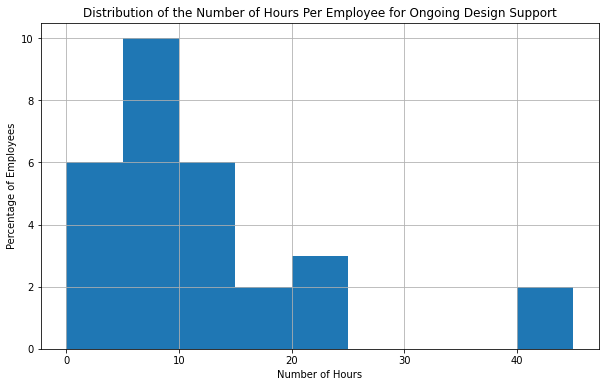

In [143]:
deliverable_distribution("Ongoing Design Support", "2021-02-06", "2021-02-13")
plt.title("Distribution of the Number of Hours Per Employee for Ongoing Design Support")
plt.xlabel("Number of Hours")
plt.ylabel("Percentage of Employees");

In [144]:
deliverable_distribution("RM-SL-Meetings and Communication_5")
plt.title("Distribution of the Number of Hours Per Employee for RM-SL-Meetings and Communication_5")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

TypeError: deliverable_distribution() missing 2 required positional arguments: 'start_date' and 'end_date'

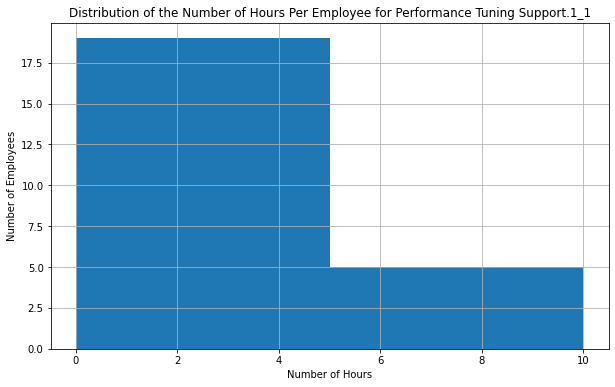

In [512]:
deliverable_distribution("Performance Tuning Support.1_1")
plt.title("Distribution of the Number of Hours Per Employee for Performance Tuning Support.1_1")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

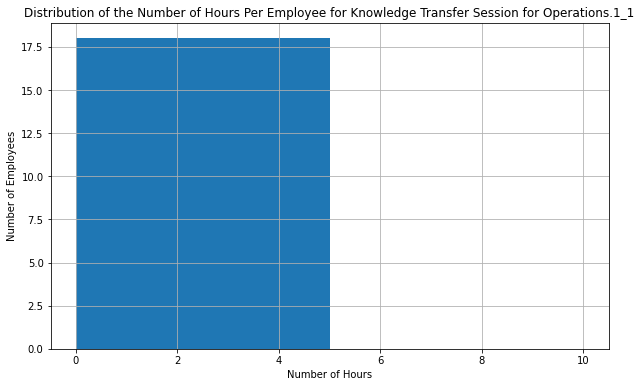

In [513]:
deliverable_distribution("Knowledge Transfer Session for Operations.1_1")
plt.title("Distribution of the Number of Hours Per Employee for Knowledge Transfer Session for Operations.1_1")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

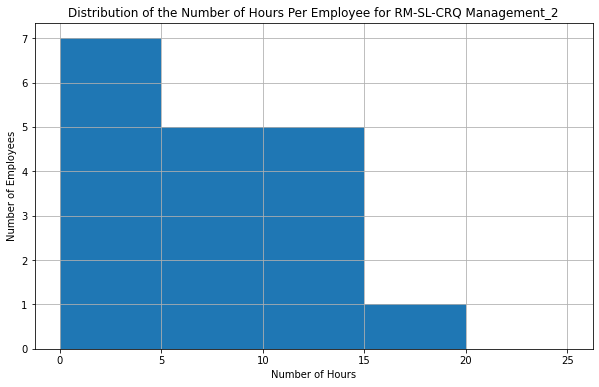

In [514]:
deliverable_distribution("RM-SL-CRQ Management_2")
plt.title("Distribution of the Number of Hours Per Employee for RM-SL-CRQ Management_2")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

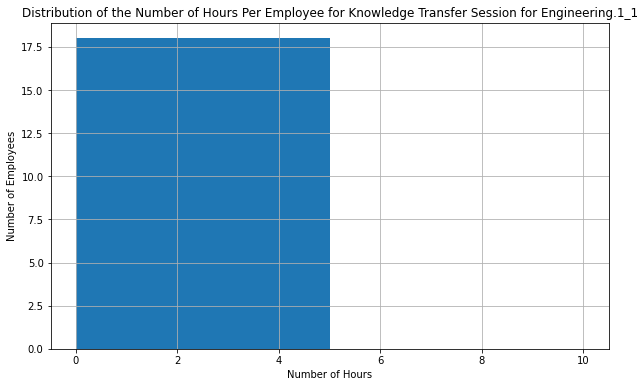

In [515]:
deliverable_distribution("Knowledge Transfer Session for Engineering.1_1")
plt.title("Distribution of the Number of Hours Per Employee for Knowledge Transfer Session for Engineering.1_1")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

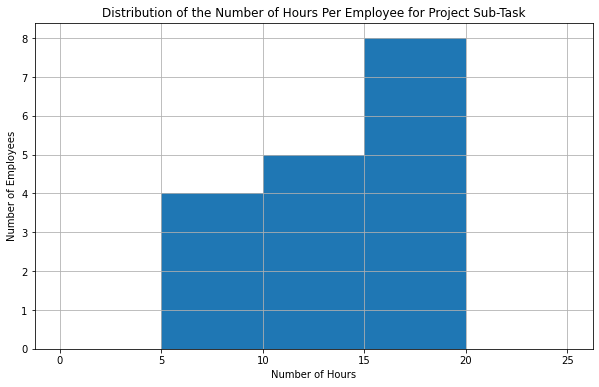

In [516]:
deliverable_distribution("Project Sub-Task")
plt.title("Distribution of the Number of Hours Per Employee for Project Sub-Task")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

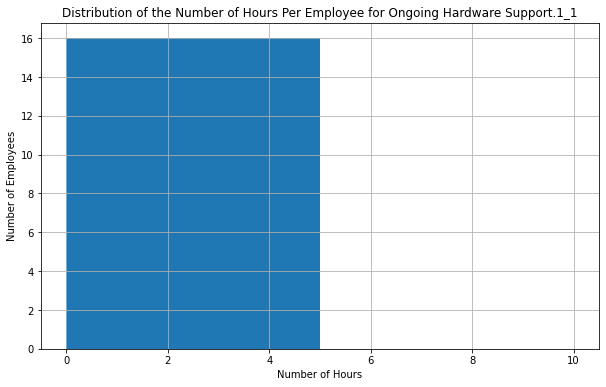

In [517]:
deliverable_distribution("Ongoing Hardware Support.1_1")
plt.title("Distribution of the Number of Hours Per Employee for Ongoing Hardware Support.1_1")
plt.xlabel("Number of Hours")
plt.ylabel("Number of Employees");

In [ ]:
#Calculate the average, standard deviation, median, and variance of these distributions
#Make an optional parameter where you can specifically enter the role of a person OR the person's email address